In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn import metrics, naive_bayes
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


from keras import datasets, layers, models


from keras.layers import Dense
from keras import datasets, layers, models
import math

from sklearn.cluster import KMeans
import tensorflow as tf
from keras import layers, datasets, models
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

In [ ]:
df = pd.read_excel("/content/Fianal-Exam-Set1.xlsx")

In [ ]:
df.head(5)

Y      X1      X2      X3      X4      X5      X6      X7      X8  \
0  1296.3  1294.7  1300.1  1285.7  1283.5  1279.4  1283.5  1281.7  1279.2   
1  1285.0  1296.3  1294.7  1300.1  1285.7  1283.5  1279.4  1283.5  1281.7   
2  1274.5  1285.0  1296.3  1294.7  1300.1  1285.7  1283.5  1279.4  1283.5   
3  1276.1  1274.5  1285.0  1296.3  1294.7  1300.1  1285.7  1283.5  1279.4   
4  1272.0  1276.1  1274.5  1285.0  1296.3  1294.7  1300.1  1285.7  1283.5   

       X9  ...     X21     X22     X23     X24     X25     X26     X27  \
0  1269.7  ...  1286.8  1290.6  1288.6  1309.1  1303.5  1297.1  1290.4   
1  1279.2  ...  1272.6  1286.8  1290.6  1288.6  1309.1  1303.5  1297.1   
2  1281.7  ...  1272.2  1272.6  1286.8  1290.6  1288.6  1309.1  1303.5   
3  1283.5  ...  1271.9  1272.2  1272.6  1286.8  1290.6  1288.6  1309.1   
4  1279.4  ...  1273.5  1271.9  1272.2  1272.6  1286.8  1290.6  1288.6   

      X28     X29     X30  
0  1289.0  1289.9  1290.0  
1  1290.4  1289.0  1289.9  
2  1297.1  1290.4  1289.0  
3  1303.5  1297.1  1290.4  
4  1309.1  1303.5  1297.1  

[5 rows x 31 columns]

# **Data Understanding**

# **Preprocessing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229 entries, 0 to 1228
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       1229 non-null   float64
 1   X1      1229 non-null   float64
 2   X2      1229 non-null   float64
 3   X3      1229 non-null   float64
 4   X4      1229 non-null   float64
 5   X5      1229 non-null   float64
 6   X6      1229 non-null   float64
 7   X7      1229 non-null   float64
 8   X8      1229 non-null   float64
 9   X9      1229 non-null   float64
 10  X10     1229 non-null   float64
 11  X11     1229 non-null   float64
 12  X12     1229 non-null   float64
 13  X13     1229 non-null   float64
 14  X14     1229 non-null   float64
 15  X15     1229 non-null   float64
 16  X16     1229 non-null   float64
 17  X17     1229 non-null   float64
 18  X18     1229 non-null   float64
 19  X19     1229 non-null   float64
 20  X20     1229 non-null   float64
 21  X21     1229 non-null   float64
 22  

In [ ]:
df.dropna(inplace=True)

In [ ]:
duplicate_rows = df[df.duplicated()]

print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [Y, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26, X27, X28, X29, X30]
Index: []

[0 rows x 31 columns]


# **Partitioning**

In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split



# # Split the data into training (80%) and testing (20%)
# train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)  # random_state for reproducibility

# # Export train and test dataframes to Excel files
# train_df.to_excel('/content/TrainingData1.xlsx', index=False)
# test_df.to_excel('/content/TestingData1.xlsx', index=False)

# "Training and testing data have been exported to Excel files successfully."

In [ ]:
train_df = pd.read_excel("/content/TrainingData1.xlsx")
test_df = pd.read_excel("/content/TestingData1.xlsx")
X_train = train_df.drop(columns=['Y']).values  # Features train
y_train = train_df['Y'].values  # Target train

X_test = test_df.drop(columns=['Y']).values  # Features test
y_test = test_df['Y'].values  # Target test

# train_df now contains 80% of the original DataFrame, randomly sampled
# test_df now contains the remaining 20% of the original DataFrame
print("Training DataFrame shape:", train_df.shape)
print("Testing DataFrame shape:", test_df.shape)
print(f"Shape of partitions:\n X_train: {X_train.shape}, \n X_test: {X_test.shape}")

Training DataFrame shape: (983, 31)
Testing DataFrame shape: (246, 31)
Shape of partitions:
 X_train: (983, 30), 
 X_test: (246, 30)


In [ ]:
df.shape

(1229, 31)

# **Statistical Model**

# **Train linear regression model:**

In [ ]:
# create linear regression object
linear_reg = linear_model.LinearRegression(fit_intercept=True)
# fit the linear regression model to your training data
linear_reg.fit(X_train, y_train)
print(f"intercept:{linear_reg.intercept_}\n")
print(f"Estiamted coefficients:{linear_reg.coef_}")

intercept:10.996740896195206

Estiamted coefficients:[ 0.9850998   0.02252641 -0.01464863 -0.04430781  0.08095848 -0.1051743
  0.00414234  0.12912902 -0.04883499 -0.03073708 -0.00730028 -0.00232372
  0.05973975  0.00213758 -0.08925779  0.02714007 -0.02362059  0.07145879
 -0.11268611  0.09064128  0.04023607 -0.0621883  -0.01158585  0.03744979
  0.02689578 -0.07926611  0.02742816  0.11446739 -0.12280206  0.02950703]


Linear Regression Equation:  ŷ =β0+β1X1+...+βkXk



# **Test the prediction performance:**

In [ ]:
import numpy as np
from sklearn import metrics

y_pred_LG = linear_reg.predict(X_test)

# Root Mean Squared Error (RMSE)
RMSE_sk = np.sqrt(metrics.mean_squared_error(y_test, y_pred_LG))
print(f"RMSE_LG: {RMSE_sk}")

# Mean Absolute Deviation (MAD)
MAD_sk = np.mean(np.abs(y_test - y_pred_LG))
print(f"MAD_LG: {MAD_sk}")

MAE_sk = metrics.mean_absolute_error(y_test, y_pred_LG)
print(f"MAE_LG: {MAE_sk}")

# Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred_LG):
    return np.mean(np.abs((y_true - y_pred_LG) / y_true)) * 100
MAPE_sk = mean_absolute_percentage_error(y_test, y_pred_LG)
print(f"MAPE_LG: {MAPE_sk}")


RMSE_LG: 19.084634217272495
MAD_LG: 13.258855461230587
MAE_LG: 13.258855461230587
MAPE_LG: 0.7443551453159261


# **Statistical Analysis of Linear Regression**

In [ ]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train) # Add a column of ones to an array to estimate the intercept.
model = sm.OLS(y_train, X_train) #endog: dependent variable, exog: regressors
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     3487.
Date:                Thu, 18 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:47:50   Log-Likelihood:                -4183.1
No. Observations:                 983   AIC:                             8428.
Df Residuals:                     952   BIC:                             8580.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.9967      5.570      1.974      0.0

Random search

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RMSE: 19.084634217272495
MAE: 13.258855461230587
MAD: 13.258855461230587
MAPE: 0.7443551453159261
Best Parameters: {'fit_intercept': True}


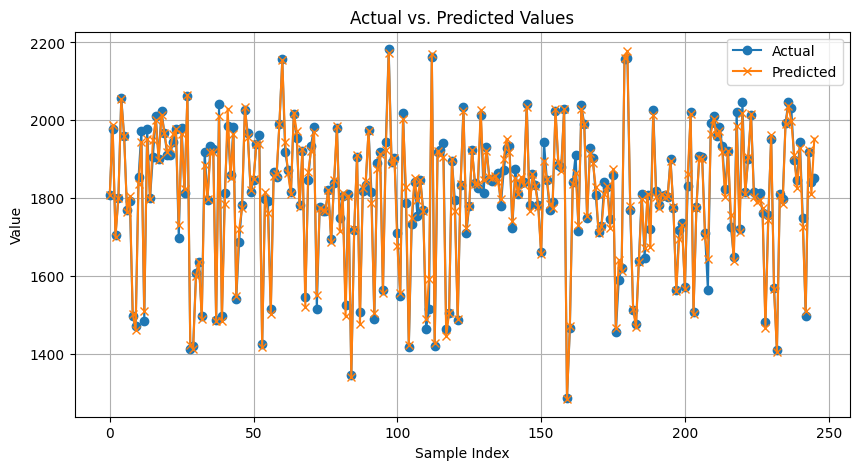

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define the linear regression model
linear_reg = LinearRegression()

# Define the parameter grid for Randomized Search
param_grid = {
    'fit_intercept': [True, False],  # Whether to calculate the intercept for this model
    # Add more hyperparameters to tune if needed
}

# Define the Randomized Search
random_search = RandomizedSearchCV(linear_reg, param_distributions=param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Perform Randomized Search on the training data
random_search.fit(X_train, y_train)

# Get the best estimator from Randomized Search
best_estimator = random_search.best_estimator_

# Make predictions
y_pred = best_estimator.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mad = np.mean(np.abs(y_pred - y_test))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print evaluation metrics
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAD: {mad}')
print(f'MAPE: {mape}')

# Print the best parameters found by Randomized Search
print("Best Parameters:", random_search.best_params_)


plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Save results to Excel
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df.to_excel('linear_regression_Results_DS1.xlsx', index=False)


Best LR

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RMSE: 19.084634217272495
MAE: 13.258855461230587
MAD: 13.258855461230587
MAPE: 0.7443551453159261
Best Parameters: {'fit_intercept': True}
Coefficients: [ 0.9850998   0.02252641 -0.01464863 -0.04430781  0.08095848 -0.1051743
  0.00414234  0.12912902 -0.04883499 -0.03073708 -0.00730028 -0.00232372
  0.05973975  0.00213758 -0.08925779  0.02714007 -0.02362059  0.07145879
 -0.11268611  0.09064128  0.04023607 -0.0621883  -0.01158585  0.03744979
  0.02689578 -0.07926611  0.02742816  0.11446739 -0.12280206  0.02950703]
Intercept: 10.996740896195206


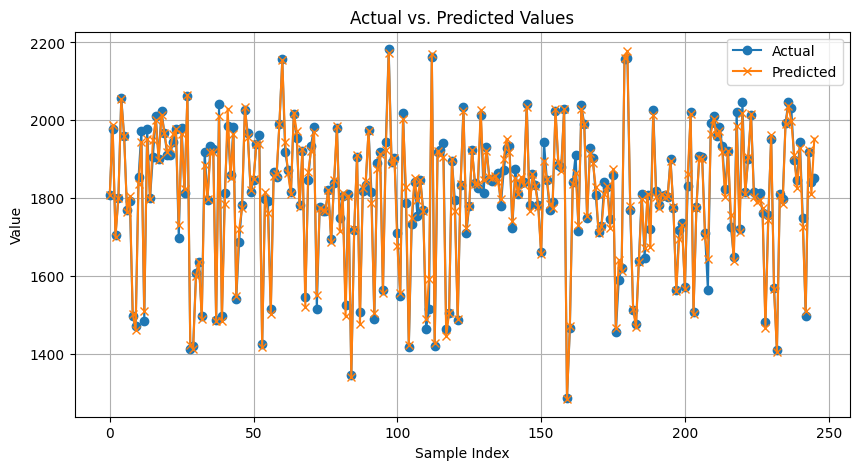

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Assuming X_train, y_train, X_test, y_test are already defined in your environment

# Define the linear regression model
linear_reg = LinearRegression()

# Define the parameter grid for Randomized Search
param_grid = {
    'fit_intercept': [True, False],  # Whether to calculate the intercept for this model
    # Add more hyperparameters to tune if needed
}

# Define the Randomized Search
random_search = RandomizedSearchCV(linear_reg, param_distributions=param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Perform Randomized Search on the training data
random_search.fit(X_train, y_train)

# Get the best estimator from Randomized Search
best_estimator = random_search.best_estimator_

# Make predictions
y_pred = best_estimator.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mad = np.mean(np.abs(y_pred - y_test))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print evaluation metrics
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAD: {mad}')
print(f'MAPE: {mape}')

# Print the best parameters found by Randomized Search
print("Best Parameters:", random_search.best_params_)

# Print the coefficients of the best estimator
print("Coefficients:", best_estimator.coef_)

# If fit_intercept is True, also print the intercept
if best_estimator.fit_intercept:
    print("Intercept:", best_estimator.intercept_)

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Save results to Excel
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df.to_excel('linear_regression_Results_DS1.xlsx', index=False)


# **Polynomial Regression**

Degree 1:
X_poly_train shape: (983, 31)
X_poly_test shape: (246, 31)
Degree 2:
X_poly_train shape: (983, 496)
X_poly_test shape: (246, 496)
Degree 3:
X_poly_train shape: (983, 5456)
X_poly_test shape: (246, 5456)
Degree 4:
X_poly_train shape: (983, 46376)
X_poly_test shape: (246, 46376)
Degree 5:
X_poly_train shape: (983, 324632)
X_poly_test shape: (246, 324632)
Best Polynomial degree: 1


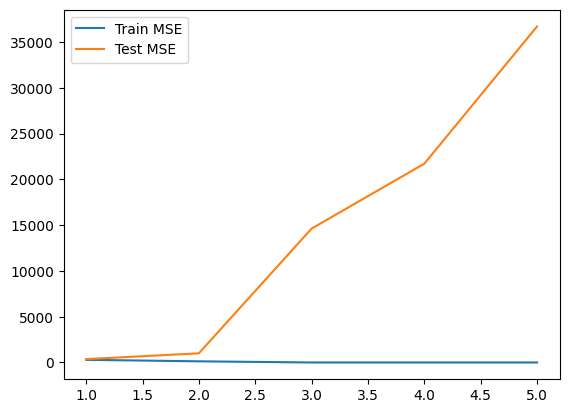

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

train_MSE = []
test_MSE = []

# Test lower degrees first
max_degree = 5  # Limit the maximum degree to avoid high memory usage
for degree in range(1, max_degree + 1):
    poly_features = PolynomialFeatures(degree=degree, include_bias=True)
    X_poly_train = poly_features.fit_transform(X_train)
    X_poly_test = poly_features.transform(X_test)

    print(f"Degree {degree}:")
    print("X_poly_train shape:", X_poly_train.shape)
    print("X_poly_test shape:", X_poly_test.shape)

    lin_reg = LinearRegression()
    lin_reg.fit(X_poly_train, y_train)
    y_train_pred_LP = lin_reg.predict(X_poly_train)
    y_test_pred_LP = lin_reg.predict(X_poly_test)

    train_error = mean_squared_error(y_train, y_train_pred_LP)
    test_error = mean_squared_error(y_test, y_test_pred_LP)
    train_MSE.append(train_error)
    test_MSE.append(test_error)

print(f'Best Polynomial degree: {test_MSE.index(min(test_MSE)) + 1}')
plt.plot(range(1, max_degree + 1), train_MSE, label='Train MSE')
plt.plot(range(1, max_degree + 1), test_MSE, label='Test MSE')
plt.legend()
plt.show()


# **with PCA**

Best Polynomial degree: 5


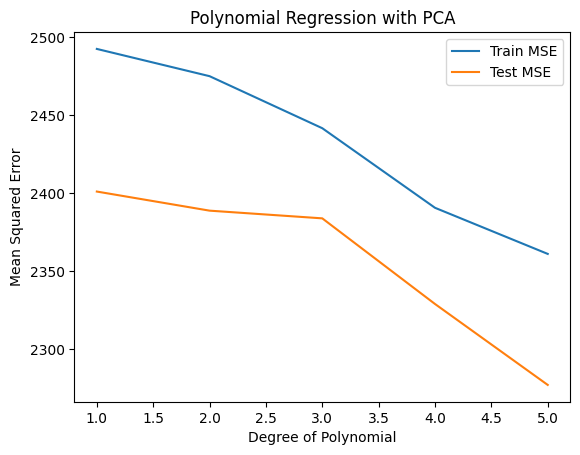

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


pca = PCA(n_components=0.95)  # Adjust this to your needs

# Apply PCA to the scaled data
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Store the train and test MSE for different polynomial degrees
train_MSE = []
test_MSE = []

# Define the maximum degree for polynomial features
max_degree = 5

# Loop over degrees to evaluate the model
for degree in range(1, max_degree + 1):
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree, include_bias=True)
    X_poly_train = poly_features.fit_transform(X_train_pca)
    X_poly_test = poly_features.transform(X_test_pca)

    # Fit a linear regression model
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly_train, y_train)

    # Predict and evaluate on the training set
    y_train_pred_LP = lin_reg.predict(X_poly_train)
    train_error = mean_squared_error(y_train, y_train_pred_LP)
    train_MSE.append(train_error)

    # Predict and evaluate on the test set
    y_test_pred_LP = lin_reg.predict(X_poly_test)
    test_error = mean_squared_error(y_test, y_test_pred_LP)
    test_MSE.append(test_error)

# Output the best degree based on test MSE
best_degree_index = test_MSE.index(min(test_MSE))
best_degree = range(1, max_degree + 1)[best_degree_index]
print(f'Best Polynomial degree: {best_degree}')

# Plot the train and test MSE
plt.plot(range(1, max_degree + 1), train_MSE, label='Train MSE')
plt.plot(range(1, max_degree + 1), test_MSE, label='Test MSE')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.title('Polynomial Regression with PCA')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error



# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_LP))

# Calculate MAE
mae = mean_absolute_error(y_test, y_test_pred_LP)

# Calculate MAD (Median Absolute Deviation)
mad = median_absolute_error(y_test, y_test_pred_LP)

# Calculate MAPE - Note: y_test must not contain any zero values for this calculation
mape = np.mean(np.abs((y_test - y_test_pred_LP) / y_test)) * 100

# Print the metrics
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAD: {mad}")
print(f"MAPE: {mape} %")


RMSE: 47.718940162379276
MAE: 37.02965404925371
MAD: 29.72040706295661
MAPE: 2.043724360218408 %


Random search

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import randint
import matplotlib.pyplot as plt

# Define a pipeline for scaling, PCA, and linear regression with polynomial features
pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('pca', PCA()),
    ('poly', PolynomialFeatures(include_bias=False)),
    ('lin_reg', LinearRegression())
])

# Define the parameter distributions for RandomizedSearchCV
param_distributions = {
    'pca__n_components': randint(1, X_train.shape[1]),  # Assuming X_train has been defined
    'poly__degree': randint(1, 6),  # Polynomial degree from 1 to 5
}

# Create a scorer for mean squared error
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=20,  # Number of parameter settings that are sampled
    cv=5,       # Number of folds in cross-validation
    scoring=mse_scorer,
    random_state=42,
    verbose=1
)

# Execute the random search
random_search.fit(X_train, y_train)

# Best model found by random search
best_model = random_search.best_estimator_
print("Best parameters found:", random_search.best_params_)

# Make predictions using the best model
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calculate RMSE for the predictions
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Output RMSE
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found: {'pca__n_components': 12, 'poly__degree': 1}
Train RMSE: 18.43069269326154
Test RMSE: 19.79425614183188


Best Polynomial

Test RMSE: 19.79387836212095
Test MAE: 13.819538189748865
Test MAD: 9.755327430093985
Test MAPE: 0.7733804105910083%


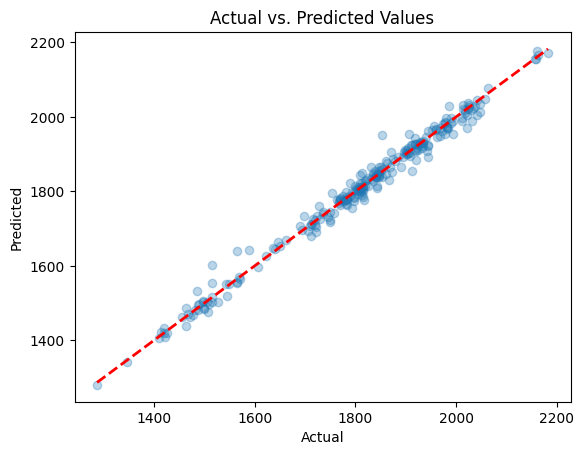

Results saved to Excel file: /content/Polynomial_regression_Results_DS1.xlsx


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
import matplotlib.pyplot as plt

# Function to calculate Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Assuming df is your DataFrame and it has been preprocessed appropriately
# X = df.drop(columns=['Y']).values
# y = df['Y'].values

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize PCA with the number of components found to be best
pca = PCA(n_components=12)  # Best parameter from random search
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Create polynomial features with the degree found to be best
poly_features = PolynomialFeatures(degree=1, include_bias=True)  # Best parameter from random search
X_train_poly = poly_features.fit_transform(X_train_pca)
X_test_poly = poly_features.transform(X_test_pca)

# Fit a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

# Predict and evaluate on the test set
y_test_pred = lin_reg.predict(X_test_poly)

# Calculate evaluation metrics
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mad = median_absolute_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

# Output the evaluation metrics
print(f"Test RMSE: {test_rmse}")
print(f"Test MAE: {test_mae}")
print(f"Test MAD: {test_mad}")
print(f"Test MAPE: {test_mape}%")

# Plot the actual vs. predicted values
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

# Save the actual and predicted values to an Excel file
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
excel_path = '/content/Polynomial_regression_Results_DS1.xlsx'
results_df.to_excel(excel_path, index=False)

print(f"Results saved to Excel file: {excel_path}")



# **Gaussian Processes**

RMSE: 42.014
MAE: 29.113
MAD: 19.645
MAPE: 1.613%


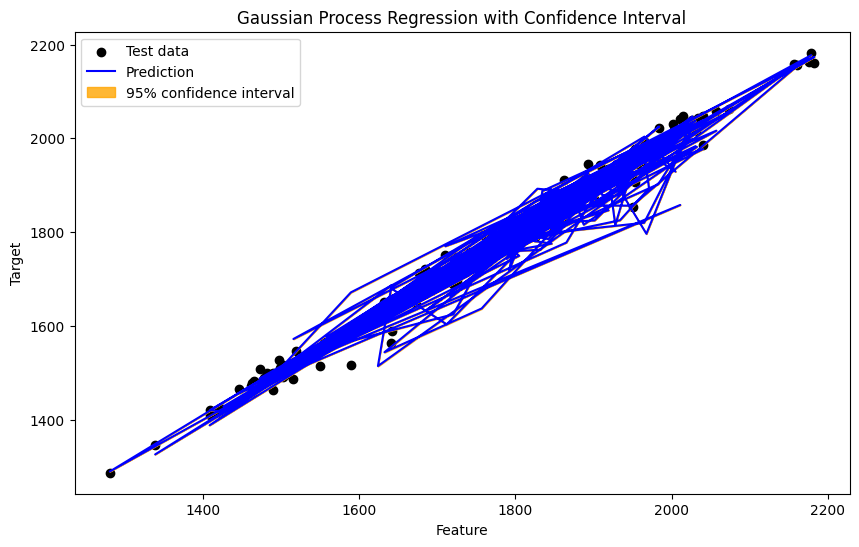

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# Function to calculate Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


# Set up the kernel and Gaussian Process Regressor
kernel = RBF(length_scale=1.0)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit the model
gp.fit(X_train, y_train)

# Make predictions on the test set
y_pred_GB, sigma = gp.predict(X_test, return_std=True)

# Calculate evaluation metrics
rmse_GB = np.sqrt(mean_squared_error(y_test, y_pred_GB))
mae_GB = mean_absolute_error(y_test, y_pred_GB)
mad_GB = median_absolute_error(y_test, y_pred_GB)
mape_GB = mean_absolute_percentage_error(y_test, y_pred_GB)

# Print the evaluation metrics
print(f'RMSE: {rmse_GB:.3f}')
print(f'MAE: {mae_GB:.3f}')
print(f'MAD: {mad_GB:.3f}')
print(f'MAPE: {mape_GB:.3f}%')

# Adjusted visualization of the confidence interval for visibility
confidence_factor = 1.96 * np.maximum(sigma, 0.01)  # Ensure a minimum visibility threshold

# Plot the test data, prediction, and the 95% confidence interval
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], y_test, c='k', label='Test data')
plt.plot(X_test[:, 0], y_pred_GB, 'b-', label='Prediction')

# Plot the confidence interval with a minimum threshold for visibility
plt.fill_between(X_test[:, 0],
                 y_pred_GB - confidence_factor,
                 y_pred_GB + confidence_factor,
                 color='orange', alpha=0.8, label="95% confidence interval")

plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Gaussian Process Regression with Confidence Interval')
plt.legend(loc='upper left')
plt.show()






Random search

Random search

In [ ]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define the kernel with default parameters to optimize
kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))

# Setup Gaussian Process Regressor
gp = GaussianProcessRegressor(kernel=kernel)

# Parameter distribution for Randomized Search
param_dist = {
    'kernel__k1__constant_value': uniform(0.1, 10.0),
    'kernel__k2__length_scale': uniform(0.1, 10.0),
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=gp,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42,
    scoring='neg_mean_squared_error'
)

# Fit Randomized Search
random_search.fit(X_train, y_train)

# Best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best parameters found:", best_params)
print("Best score (neg_mean_squared_error):", best_score)

# Now let's use the best parameters to create a GaussianProcessRegressor model
optimal_kernel = C(best_params['kernel__k1__constant_value']) * RBF(best_params['kernel__k2__length_scale'])
optimal_gp = GaussianProcessRegressor(kernel=optimal_kernel, n_restarts_optimizer=9)

# Fit the model with the best kernel
optimal_gp.fit(X_train, y_train)

# Predictions
y_pred, sigma = optimal_gp.predict(X_test, return_std=True)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Output the evaluation metrics
print(f"Test RMSE: {rmse:.3f}")
print(f"Test MAE: {mae:.3f}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=3.845401188473625, kernel__k2__length_scale=9.60714306409916; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=3.845401188473625, kernel__k2__length_scale=9.60714306409916; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=3.845401188473625, kernel__k2__length_scale=9.60714306409916; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=7.41993941811405, kernel__k2__length_scale=6.086584841970366; total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=7.41993941811405, kernel__k2__length_scale=6.086584841970366; total time=   3.5s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=7.41993941811405, kernel__k2__length_scale=6.086584841970366; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=1.6601864044243653, kernel__k2__length_scale=1.6599452033620266; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=1.6601864044243653, kernel__k2__length_scale=1.6599452033620266; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=1.6601864044243653, kernel__k2__length_scale=1.6599452033620266; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=0.6808361216819946, kernel__k2__length_scale=8.761761457749351; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=0.6808361216819946, kernel__k2__length_scale=8.761761457749351; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=0.6808361216819946, kernel__k2__length_scale=8.761761457749351; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=6.1111501174320875, kernel__k2__length_scale=7.180725777960454; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=6.1111501174320875, kernel__k2__length_scale=7.180725777960454; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=6.1111501174320875, kernel__k2__length_scale=7.180725777960454; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=0.30584494295802445, kernel__k2__length_scale=9.799098521619943; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=0.30584494295802445, kernel__k2__length_scale=9.799098521619943; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=0.30584494295802445, kernel__k2__length_scale=9.799098521619943; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=8.424426408004217, kernel__k2__length_scale=2.2233911067827616; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=8.424426408004217, kernel__k2__length_scale=2.2233911067827616; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=8.424426408004217, kernel__k2__length_scale=2.2233911067827616; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=1.9182496720710063, kernel__k2__length_scale=1.9340450985343383; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=1.9182496720710063, kernel__k2__length_scale=1.9340450985343383; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=1.9182496720710063, kernel__k2__length_scale=1.9340450985343383; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=3.1424224295953773, kernel__k2__length_scale=5.347564316322378; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=3.1424224295953773, kernel__k2__length_scale=5.347564316322378; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=3.1424224295953773, kernel__k2__length_scale=5.347564316322378; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=4.419450186421157, kernel__k2__length_scale=3.0122914019804194; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=4.419450186421157, kernel__k2__length_scale=3.0122914019804194; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=4.419450186421157, kernel__k2__length_scale=3.0122914019804194; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Best parameters found: {'kernel__k1__constant_value': 3.845401188473625, 'kernel__k2__length_scale': 9.60714306409916}
Best score (neg_mean_squared_error): -186585.53975773347
Test RMSE: 31.804
Test MAE: 23.612


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Best Gaussian

Test RMSE: 23.17984950215713
Test MAE: 16.497712705114466
Test MAD: 12.971030206633714
Test MAPE: 0.9220608782752616%


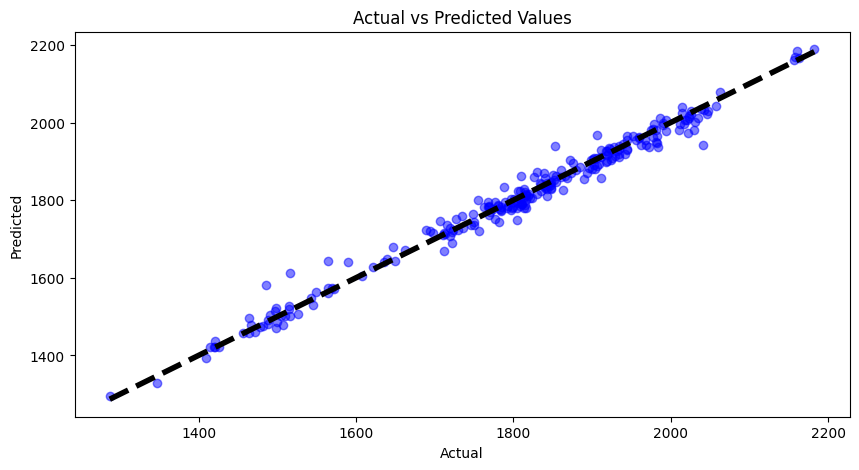

Results saved to Excel file: /content/Gaussian Process_Randomsearch_Results_DS1.xlsx


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.preprocessing import StandardScaler

# Adjust the bounds for the kernel parameters
constant_value = 3.845401188473625
length_scale = 9.60714306409916
kernel = C(constant_value, (1e-3, 1e6)) * RBF(length_scale, (1e-6, 1e3))

# Initialize Gaussian Process Regressor with the best kernel
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
# Fit the model
gp.fit(X_train, y_train.ravel())

# Make predictions
scaler = StandardScaler()
y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1)).ravel()  # Fit and transform training data
gp.fit(X_train, y_train_scaled)  # Fit model with scaled target

y_test_pred, sigma = gp.predict(X_test, return_std=True)
y_test_pred = scaler.inverse_transform(y_test_pred.reshape(-1, 1)).ravel()

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae = mean_absolute_error(y_test, y_test_pred)
mad = median_absolute_error(y_test, y_test_pred)
mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Output the evaluation metrics
print(f"Test RMSE: {rmse}")
print(f"Test MAE: {mae}")
print(f"Test MAD: {mad}")
print(f"Test MAPE: {mape}%")

# Plot the test data, prediction, and the 95% confidence interval
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_test_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Line showing perfect predictions
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

results_df = pd.DataFrame({
    'Actual': y_test.ravel(),
    'Predicted': y_test_pred,
    'Lower CI': y_test_pred - 1.96 * sigma,
    'Upper CI': y_test_pred + 1.96 * sigma
})


results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
excel_path = '/content/Gaussian Process_Randomsearch_Results_DS1.xlsx'
results_df.to_excel(excel_path, index=False)

print(f"Results saved to Excel file: {excel_path}")


# **Time Series**

ACF and PACF


Decomposition Plot: The seasonal component of time series decomposition plot does not exhibit a clear repeating pattern. This suggests that there isn't a strong seasonality present in the data, or at least it's not detectable with the decomposition method used.

ACF and PACF Plots: In the ACF and PACF plots, there are no repeating spikes at fixed intervals, which would be indicative of seasonality. Both plots show correlations that are within the confidence bounds after the immediate lag, which typically signifies a lack of significant autocorrelation and seasonality.

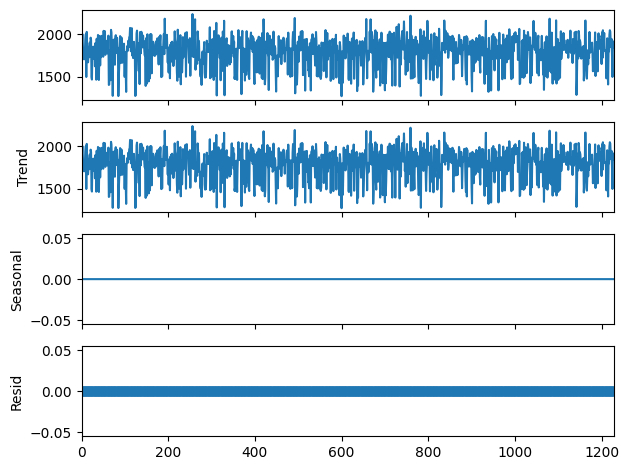

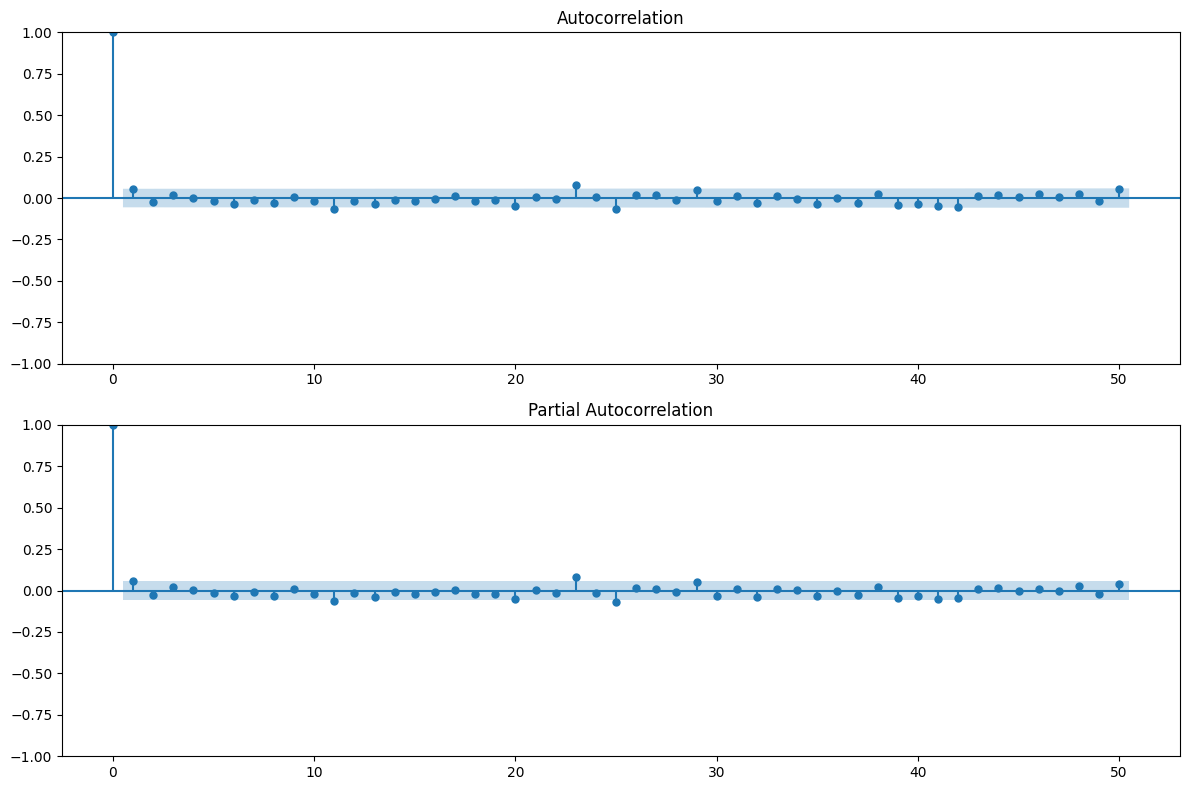

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

y = np.concatenate((y_train, y_test))

# Flatten the array to make it 1-dimensional
y = y.flatten()

# Convert to pandas Series (if not already in this format)
y_series = pd.Series(y)

# Decompose the combined time series
# Note: The period should be replaced with the expected seasonality period of your data (e.g., 12 for monthly data)
decomposition_result = seasonal_decompose(y_series, model='additive', period=1)  # Modify 'period' accordingly

# Plot the decomposed components of the time series
decomposition_result.plot()
plt.show()

# Create ACF and PACF plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot the ACF
plot_acf(y_series, ax=ax1, lags=50)  # Modify the lags if necessary

# Plot the PACF
plot_pacf(y_series, ax=ax2, lags=50)  # Modify the lags if necessary

plt.tight_layout()
plt.show()

Movin Average

univariate

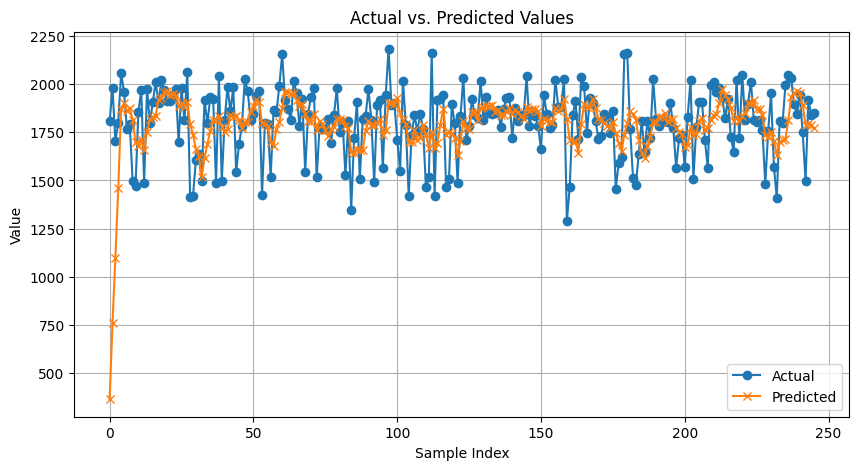

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def moving_average(data, window_size):
    """Calculate the moving average using a simple sliding window approach."""
    weights = np.ones(window_size) / window_size
    return np.convolve(data, weights, mode='valid')

def predict_with_moving_average(y_train, y_test, window_size):
    """Use moving average to predict the values in y_test based on y_train"""
    # Flatten both y_train and y_test to ensure they are one-dimensional
    y_train = np.ravel(y_train)
    y_test = np.ravel(y_test)
    # Combine train and test for the moving average calculation
    full_series = np.concatenate((y_train, y_test))
    moving_avg_predictions = moving_average(full_series, window_size)
    # Only the predictions for the test set
    return moving_avg_predictions[-len(y_test):]


# Let's assume y_train and y_test are defined
window_size = 5
y_pred_ma = predict_with_moving_average(y_train, y_test, window_size)

def plot_predictions(y_test, y_pred):
    plt.figure(figsize=(10, 5))
    plt.plot(y_test, label='Actual', marker='o')
    plt.plot(y_pred, label='Predicted', marker='x')
    plt.title('Actual vs. Predicted Values')
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Calling the plot function to visualize the results
plot_predictions(y_test, y_pred_ma)

# Ensure y_train and y_test are correct
# Example: y_train = np.random.rand(100)
# Example: y_test = np.random.rand(20)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mad = np.mean(np.abs(y_true - y_pred))  # Same as MAE
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # MAPE in percentage

    return rmse, mae, mad, mape

# Example usage
rmse, mae, mad, mape = calculate_metrics(y_test, y_pred_ma)
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAD: {mad}")
print(f"MAPE: {mape} %")


RMSE: 201.73881484812478
MAE: 133.53275954936842
MAD: 133.53275954936842
MAPE: 7.650318316736248 %


Random search

Window Size 3, RMSE: 143.212
Window Size 12, RMSE: 168.967
Window Size 7, RMSE: 164.147
Window Size 9, RMSE: 167.020
Window Size 5, RMSE: 155.844
Window Size 4, RMSE: 149.414
Window Size 20, RMSE: 171.756
Window Size 16, RMSE: 171.812
Window Size 20, RMSE: 171.756
Window Size 11, RMSE: 167.937
Window Size 14, RMSE: 171.357
Window Size 2, RMSE: 117.870
Window Size 15, RMSE: 171.369
Window Size 16, RMSE: 171.812
Window Size 7, RMSE: 164.147
Window Size 6, RMSE: 161.248
Window Size 7, RMSE: 164.147
Window Size 18, RMSE: 170.855
Window Size 13, RMSE: 170.005
Window Size 14, RMSE: 171.357
Window Size 14, RMSE: 171.357
Window Size 11, RMSE: 167.937
Window Size 18, RMSE: 170.855
Window Size 8, RMSE: 165.190
Window Size 14, RMSE: 171.357
Window Size 8, RMSE: 165.190
Window Size 19, RMSE: 171.360
Window Size 14, RMSE: 171.357
Window Size 10, RMSE: 167.726
Window Size 16, RMSE: 171.812
Window Size 12, RMSE: 168.967
Window Size 9, RMSE: 167.020
Window Size 16, RMSE: 171.812
Window Size 4, RMSE: 1

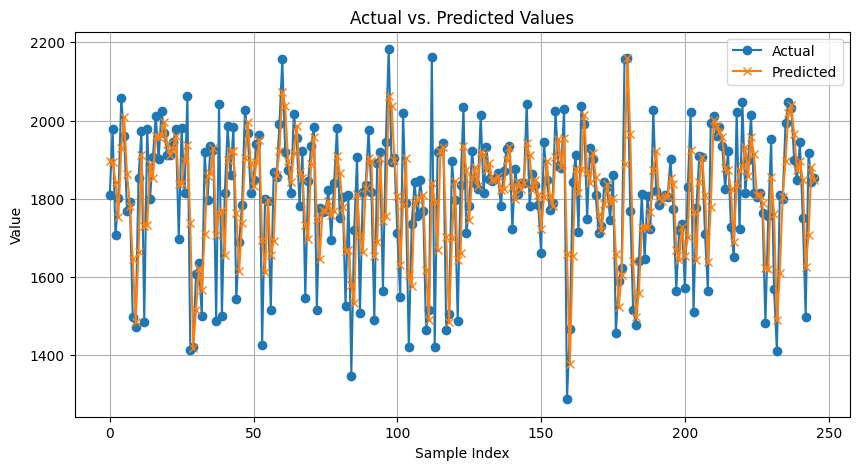

In [ ]:
import numpy as np
import pandas as pd
import random
from sklearn.metrics import mean_squared_error

def predict_with_moving_average(y_train, y_test, window_size):
    """Use moving average to predict the values in y_test based on y_train."""
    # Flatten the input arrays to ensure they are one-dimensional
    y_train_flat = np.ravel(y_train)
    y_test_flat = np.ravel(y_test)

    # Combine train and test for the moving average calculation, then just take the last len(y_test) predictions
    full_series = np.concatenate([y_train_flat, y_test_flat])
    moving_avg_predictions = moving_average(full_series, window_size)

    # Only the predictions for the test set
    return moving_avg_predictions[-len(y_test_flat):]


# Assuming y_train and y_test are numpy arrays
# Define the range for the window size and number of iterations for random search
window_sizes = range(2, 21)  # Window sizes from 2 to 20
iterations = 50  # Number of iterations for random search

best_score = float('inf')
best_window_size = None

for _ in range(iterations):
    # Randomly pick a window size from the defined range
    window_size = random.choice(window_sizes)

    # Predict using the randomly chosen window size
    y_pred_ma = predict_with_moving_average(y_train, y_test, window_size)

    # Ensure prediction length matches y_test length for fair comparison
    y_test_adjusted = y_test[-len(y_pred_ma):] if len(y_pred_ma) < len(y_test) else y_test

    # Calculate RMSE for the predictions
    rmse = np.sqrt(mean_squared_error(y_test_adjusted, y_pred_ma))

    # Update best score and window size if the current RMSE is lower
    if rmse < best_score:
        best_score = rmse
        best_window_size = window_size

    print(f'Window Size {window_size}, RMSE: {rmse:.3f}')

print(f'Best Window Size: {best_window_size}, Best RMSE: {best_score:.3f}')

# Once the best window size is found, plot predictions with the best window size
y_pred_ma_best = predict_with_moving_average(y_train, y_test, best_window_size)
plot_predictions(y_test, y_pred_ma_best)


Best Moving Average

Best Window Size: 2
RMSE: 117.870
MAE: 89.832
MAD: 89.832
MAPE: 5.172%


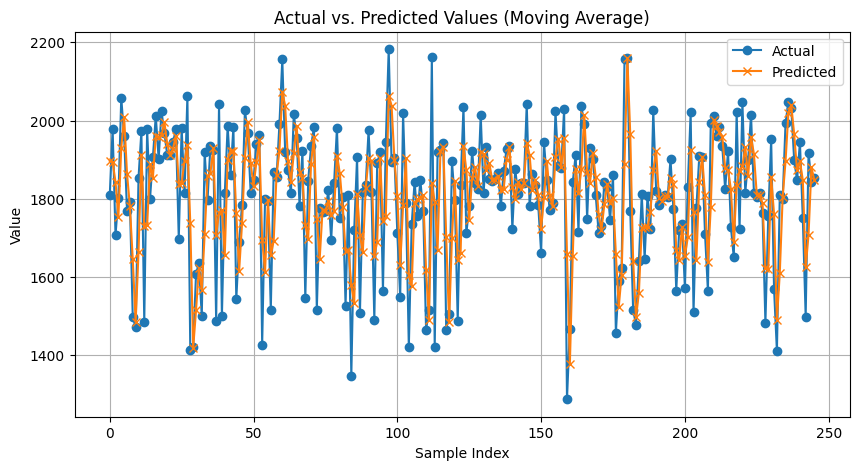

Results saved to Excel file: moving_average_uni_results_DS1.xlsx


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

def predict_with_moving_average(y_train, y_test, window_size):
    """Use moving average to predict the values in y_test based on y_train"""

    # Flatten both y_train and y_test to ensure they are one-dimensional
    y_train = np.ravel(y_train)
    y_test = np.ravel(y_test)

    # Combine train and test for the moving average calculation
    full_series = np.concatenate((y_train, y_test))
    moving_avg_predictions = moving_average(full_series, window_size)

    # Only the predictions for the test set
    return moving_avg_predictions[-len(y_test):]

# Assuming y_train and y_test are numpy arrays
best_window_size = 2  # From your random search results

# Predict using the best window size
y_pred_ma = predict_with_moving_average(y_train, y_test, best_window_size)

# Ensure prediction length matches y_test length for fair comparison
y_test_adjusted = y_test[-len(y_pred_ma):] if len(y_pred_ma) < len(y_test) else y_test

# Calculate RMSE, MAE, MAD, and MAPE
rmse = np.sqrt(mean_squared_error(y_test_adjusted, y_pred_ma))
mae = mean_absolute_error(y_test_adjusted, y_pred_ma)
mad = np.mean(np.abs(y_test_adjusted - y_pred_ma))  # Mean Absolute Deviation
mape = np.mean(np.abs((y_test_adjusted - y_pred_ma) / y_test_adjusted)) * 100  # MAPE in percentage

print(f"Best Window Size: {best_window_size}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"MAD: {mad:.3f}")
print(f"MAPE: {mape:.3f}%")


plt.figure(figsize=(10, 5))
plt.plot(y_test_adjusted, label='Actual', marker='o')
plt.plot(y_pred_ma, label='Predicted', marker='x')
plt.title('Actual vs. Predicted Values (Moving Average)')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Create a DataFrame from the test results and flatten arrays for safe measure
results_df = pd.DataFrame({
    'Actual': np.ravel(y_test),
    'Predicted_MA': np.ravel(y_pred_ma)
})

# Specify a path for the Excel file
excel_path = 'moving_average_uni_results_DS1.xlsx'

# Save the DataFrame to an Excel file
results_df.to_excel(excel_path, index=False)

print(f"Results saved to Excel file: {excel_path}")


multivariate

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

n_features = X_train.shape[1]
feature_names = [f'X{i}' for i in range(1, n_features + 1)]

# Convert arrays back to DataFrame assuming X_train and X_test are numpy arrays
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_test_df = pd.DataFrame(X_test, columns=feature_names)

# Calculate moving averages for each feature
window_size = 5
for feature in feature_names:
    X_train_df[f'{feature}_MA'] = X_train_df[feature].rolling(window=window_size, min_periods=1).mean()
    X_test_df[f'{feature}_MA'] = X_test_df[feature].rolling(window=window_size, min_periods=1).mean()

# Select only the moving average columns for modeling
X_train_MA = X_train_df[[f'{feature}_MA' for feature in feature_names]]
X_test_MA = X_test_df[[f'{feature}_MA' for feature in feature_names]]

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train_MA, y_train)

# Make predictions
y_pred = model.predict(X_test_MA)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mad = np.mean(np.abs(y_test - y_pred))  # Mean Absolute Deviation
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # MAPE in percentage

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAD: {mad:.2f}")
print(f"MAPE: {mape:.2f}%")




RMSE: 159.71
MAE: 125.47
MAD: 125.47
MAPE: 7.21%


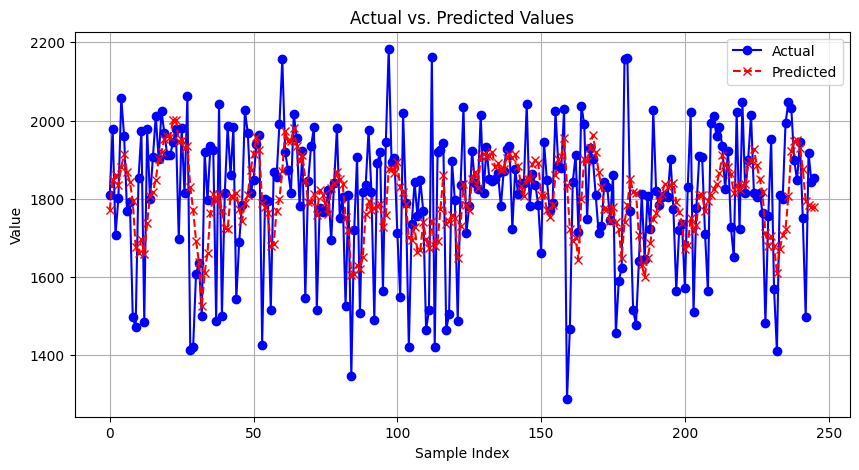

In [ ]:
import matplotlib.pyplot as plt

def plot_predictions(y_test, y_pred):
    plt.figure(figsize=(10, 5))
    plt.plot(y_test, label='Actual', marker='o', linestyle='-', color='blue')
    plt.plot(y_pred, label='Predicted', marker='x', linestyle='--', color='red')
    plt.title('Actual vs. Predicted Values')
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Assume y_test and y_pred are already defined from your model predictions
plot_predictions(y_test, y_pred)


Random search

In [ ]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

n_features = X_train.shape[1]
feature_names = [f'X{i}' for i in range(1, n_features + 1)]

# Convert arrays back to DataFrame assuming X_train and X_test are numpy arrays
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_test_df = pd.DataFrame(X_test, columns=feature_names)

# Define the range for the window size and number of iterations for random search
window_sizes = range(2, 21)  # Window sizes from 2 to 20
iterations = 50  # Number of iterations for random search

best_score = float('inf')
best_window_size = None

for _ in range(iterations):
    # Randomly pick a window size from the defined range
    window_size = random.choice(window_sizes)

    # Calculate moving averages for each feature using the random window size
    for feature in feature_names:
        X_train_df[f'{feature}_MA'] = X_train_df[feature].rolling(window=window_size, min_periods=1).mean()
        X_test_df[f'{feature}_MA'] = X_test_df[feature].rolling(window=window_size, min_periods=1).mean()

    # Select only the moving average columns for modeling
    X_train_MA = X_train_df[[f'{feature}_MA' for feature in feature_names]]
    X_test_MA = X_test_df[[f'{feature}_MA' for feature in feature_names]]

    # Initialize and train the linear regression model
    model = LinearRegression()
    model.fit(X_train_MA, y_train)

    # Make predictions
    y_pred = model.predict(X_test_MA)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Update best score and window size
    if rmse < best_score:
        best_score = rmse
        best_window_size = window_size

    print(f'Window Size {window_size}, RMSE: {rmse:.2f}')

print(f'Best Window Size: {best_window_size}, Best RMSE: {best_score:.2f}')


Window Size 16, RMSE: 175.62
Window Size 20, RMSE: 175.42
Window Size 13, RMSE: 173.75
Window Size 13, RMSE: 173.75
Window Size 7, RMSE: 168.64
Window Size 11, RMSE: 172.73
Window Size 3, RMSE: 145.13
Window Size 17, RMSE: 176.22
Window Size 3, RMSE: 145.13
Window Size 14, RMSE: 174.28
Window Size 14, RMSE: 174.28
Window Size 6, RMSE: 163.93
Window Size 8, RMSE: 170.14
Window Size 6, RMSE: 163.93
Window Size 11, RMSE: 172.73
Window Size 11, RMSE: 172.73
Window Size 5, RMSE: 159.71
Window Size 18, RMSE: 178.43
Window Size 13, RMSE: 173.75
Window Size 7, RMSE: 168.64
Window Size 7, RMSE: 168.64
Window Size 18, RMSE: 178.43
Window Size 19, RMSE: 178.03
Window Size 9, RMSE: 172.25
Window Size 14, RMSE: 174.28
Window Size 12, RMSE: 172.21
Window Size 19, RMSE: 178.03
Window Size 2, RMSE: 118.49
Window Size 9, RMSE: 172.25
Window Size 15, RMSE: 174.39
Window Size 16, RMSE: 175.62
Window Size 2, RMSE: 118.49
Window Size 14, RMSE: 174.28
Window Size 6, RMSE: 163.93
Window Size 12, RMSE: 172.21

Best MA Multi

RMSE: 118.49
MAE: 90.48
MAD: 90.48
MAPE: 5.19%


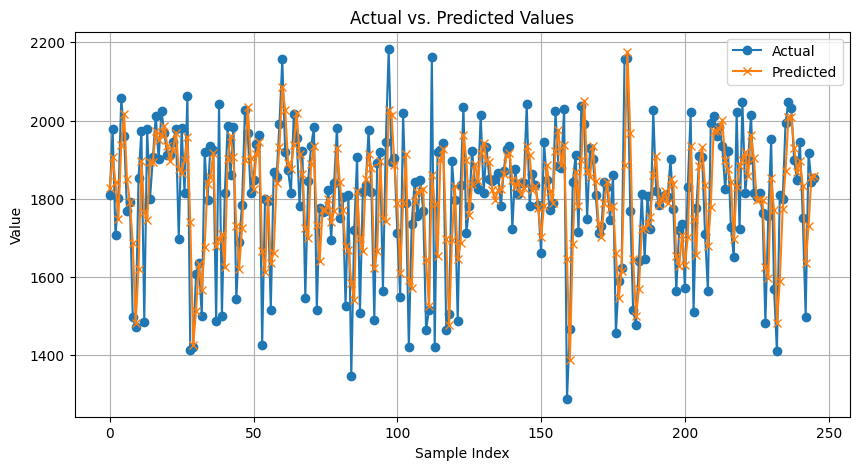

Results saved to Excel file: moving_average_Multi_results_DS1.xlsx


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

n_features = X_train.shape[1]
feature_names = [f'X{i}' for i in range(1, n_features + 1)]

# Convert arrays back to DataFrame assuming X_train and X_test are numpy arrays
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_test_df = pd.DataFrame(X_test, columns=feature_names)

# Use the best window size found from the random search
best_window_size = 2

# Calculate moving averages for each feature using the best window size
for feature in feature_names:
    X_train_df[f'{feature}_MA'] = X_train_df[feature].rolling(window=best_window_size, min_periods=1).mean()
    X_test_df[f'{feature}_MA'] = X_test_df[feature].rolling(window=best_window_size, min_periods=1).mean()

# Select only the moving average columns for modeling
X_train_MA = X_train_df[[f'{feature}_MA' for feature in feature_names]]
X_test_MA = X_test_df[[f'{feature}_MA' for feature in feature_names]]

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train_MA, y_train)

# Make predictions
y_pred = model.predict(X_test_MA)

# Calculate RMSE, MAE, MAD, and MAPE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mad = np.mean(np.abs(y_test - y_pred))  # Mean Absolute Deviation
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # MAPE in percentage

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAD: {mad:.2f}")
print(f"MAPE: {mape:.2f}%")

# Plot y_test against y_pred
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Create a DataFrame from the test results and flatten arrays for safe measure
results_df = pd.DataFrame({
    'Actual': np.ravel(y_test),
    'Predicted_MA': np.ravel(y_pred_ma)
})

# Specify a path for the Excel file
excel_path = 'moving_average_Multi_results_DS1.xlsx'

# Save the DataFrame to an Excel file
results_df.to_excel(excel_path, index=False)

print(f"Results saved to Excel file: {excel_path}")


# **Arima**

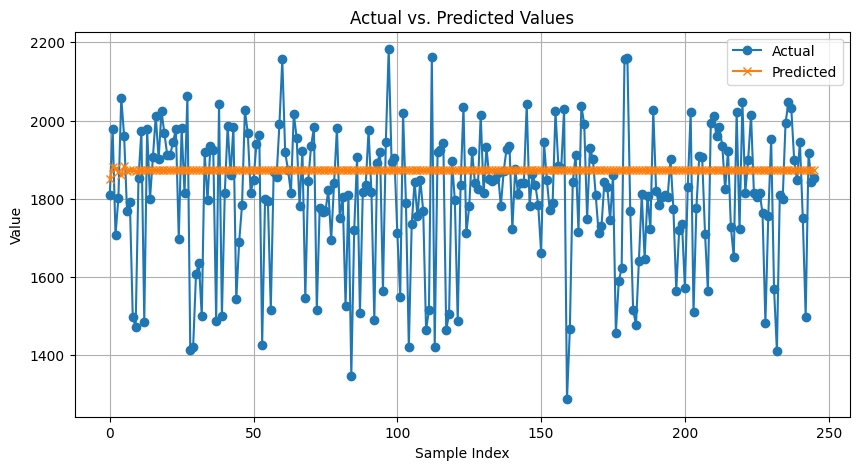

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Assuming y_train and y_test are defined and are numpy arrays
# You might need to adjust these data as pandas Series if needed

# Fit an ARIMA model
# p (periods to lag for autoregressive model), d (degree of differencing), q (size of moving average window)
p, d, q = 5, 1, 0  # These are example parameters that you might need to tune for your dataset
model = ARIMA(y_train, order=(p, d, q))
fitted_model = model.fit()

# Predict
# Start and end indices to predict in the test set
start_index = len(y_train)
end_index = start_index + len(y_test) - 1
y_pred_arima = fitted_model.predict(start=start_index, end=end_index, dynamic=True)

# Function to plot actual vs predicted values
def plot_predictions(y_test, y_pred):
    plt.figure(figsize=(10, 5))
    plt.plot(y_test, label='Actual', marker='o')
    plt.plot(y_pred, label='Predicted', marker='x')
    plt.title('Actual vs. Predicted Values')
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot predictions
plot_predictions(y_test, y_pred_arima)


In [ ]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_arima))
print(f'RMSE: {rmse}')

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred_arima)
print(f'MAE: {mae}')

# Calculate MAD
mad = np.mean(np.abs(y_pred_arima - y_test))
print(f'MAD: {mad}')

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred_arima)
print(f'MAPE: {mape}')


RMSE: 187.2031205132372
MAE: 139.4030913116748
MAD: 139.4030913116748
MAPE: 8.362955259952528


In [ ]:
X_train.shape

(983, 30)

Random search

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 2, 5) RMSE=176.230


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 1, 5) RMSE=175.916


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 2, 4) RMSE=176.236
ARIMA(1, 0, 4) RMSE=176.155
ARIMA(0, 0, 2) RMSE=176.156
ARIMA(4, 1, 1) RMSE=176.156
ARIMA(1, 0, 2) RMSE=176.159
ARIMA(5, 1, 0) RMSE=187.203
ARIMA(2, 1, 1) RMSE=176.158
ARIMA(1, 1, 5) RMSE=176.175


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels

ARIMA(5, 0, 5) RMSE=176.164
ARIMA(5, 0, 2) RMSE=176.100
ARIMA(3, 2, 0) RMSE=234.189
ARIMA(5, 1, 2) RMSE=176.160
ARIMA(1, 0, 0) RMSE=176.135
ARIMA(0, 2, 0) RMSE=45073.719
ARIMA(2, 1, 0) RMSE=189.859
ARIMA(4, 1, 0) RMSE=192.938
ARIMA(5, 1, 1) RMSE=176.168
ARIMA(1, 1, 1) RMSE=176.140


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(4, 2, 5) RMSE=175.198


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 0, 4) RMSE=176.070
ARIMA(2, 1, 1) RMSE=176.158
ARIMA(1, 1, 1) RMSE=176.140


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 0, 2) RMSE=176.158


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(5, 0, 5) RMSE=176.164
ARIMA(1, 1, 2) RMSE=176.316


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 2, 2) RMSE=178.765


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 0, 3) RMSE=176.155


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(5, 0, 4) RMSE=176.725
ARIMA(5, 2, 1) RMSE=187.604
ARIMA(2, 2, 1) RMSE=190.869


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 0, 4) RMSE=176.572


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 4) RMSE=176.251
ARIMA(1, 0, 2) RMSE=176.159


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 2, 1) RMSE=276.852
ARIMA(4, 2, 1) RMSE=193.826


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 0, 3) RMSE=176.155
ARIMA(0, 0, 4) RMSE=176.153


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(5, 2, 1) RMSE=187.604
ARIMA(0, 1, 2) RMSE=176.140
ARIMA(3, 1, 0) RMSE=191.250


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 2, 1) RMSE=276.852
ARIMA(1, 1, 0) RMSE=191.859
ARIMA(3, 1, 0) RMSE=191.250
ARIMA(0, 1, 5) RMSE=176.156
ARIMA(2, 1, 1) RMSE=176.158


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(5, 1, 5) RMSE=176.013
ARIMA(1, 0, 3) RMSE=176.123


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 5) RMSE=175.352
ARIMA(2, 2, 1) RMSE=190.869


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 5) RMSE=175.352
ARIMA(2, 0, 1) RMSE=176.159
ARIMA(3, 2, 2) RMSE=175.204
ARIMA(3, 1, 0) RMSE=191.250
ARIMA(5, 1, 2) RMSE=176.160


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels

ARIMA(3, 0, 5) RMSE=176.073


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(5, 0, 4) RMSE=176.725
ARIMA(5, 1, 3) RMSE=176.292
ARIMA(3, 1, 2) RMSE=176.157
ARIMA(4, 1, 0) RMSE=192.938
ARIMA(2, 1, 0) RMSE=189.859


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(4, 1, 4) RMSE=176.069
ARIMA(5, 0, 2) RMSE=176.100
ARIMA(4, 0, 0) RMSE=176.152


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 1, 5) RMSE=175.916
ARIMA(2, 1, 2) RMSE=176.422
ARIMA(4, 2, 2) RMSE=192.291
ARIMA(0, 0, 5) RMSE=176.162
ARIMA(2, 1, 3) RMSE=176.175


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(4, 1, 4) RMSE=176.069


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 2, 5) RMSE=175.198
ARIMA(3, 2, 1) RMSE=191.798


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(5, 0, 5) RMSE=176.164
ARIMA(5, 0, 1) RMSE=176.106


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(4, 2, 3) RMSE=176.233


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 2, 3) RMSE=176.227
ARIMA(5, 1, 3) RMSE=176.292


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 2, 1) RMSE=276.852
ARIMA(2, 2, 0) RMSE=2850.725
ARIMA(3, 0, 0) RMSE=176.158
ARIMA(1, 1, 4) RMSE=176.172
ARIMA(3, 1, 3) RMSE=176.159


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 2, 3) RMSE=176.141
ARIMA(1, 0, 4) RMSE=176.155
ARIMA(3, 1, 3) RMSE=176.159
ARIMA(0, 0, 3) RMSE=176.158


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels

ARIMA(4, 0, 3) RMSE=176.586


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 0, 4) RMSE=176.070
ARIMA(3, 1, 2) RMSE=176.157
ARIMA(2, 0, 3) RMSE=176.135


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 2, 3) RMSE=176.141
ARIMA(0, 0, 1) RMSE=176.137
ARIMA(5, 1, 0) RMSE=187.203


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(5, 2, 1) RMSE=187.604


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(5, 2, 3) RMSE=196.733
ARIMA(0, 2, 3) RMSE=176.141


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(4, 2, 5) RMSE=175.198
ARIMA(1, 2, 4) RMSE=176.236


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 2, 3) RMSE=175.518
Best ARIMA(4, 2, 5) RMSE=175.198


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


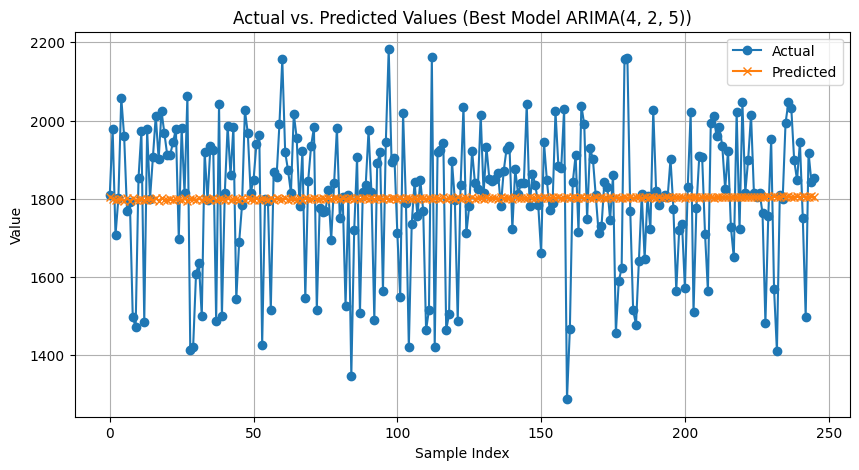

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import random

# Assuming y_train and y_test are numpy arrays or pandas Series

# Define the ranges for p, d, and q
p_range = range(0, 6)
d_range = range(0, 3)
q_range = range(0, 6)

# Set the number of iterations for random search
iterations = 100  # Define how many iterations you'd like to perform

best_score, best_order = float("inf"), None

# Perform the random search
for i in range(iterations):
    p = random.choice(p_range)
    d = random.choice(d_range)
    q = random.choice(q_range)
    order = (p, d, q)
    try:
        model = ARIMA(y_train, order=order)
        model_fit = model.fit()
        predictions = model_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1)
        error = mean_squared_error(y_test, predictions, squared=False)
        if error < best_score:
            best_score, best_order = error, order
        print(f'ARIMA{order} RMSE={error:.3f}')
    except Exception as e:
        print(f'ARIMA{order} encountered an error: {e}')
        continue

print(f'Best ARIMA{best_order} RMSE={best_score:.3f}')

# Fit the best ARIMA model found via random search
best_model = ARIMA(y_train, order=best_order)
best_model_fit = best_model.fit()
y_pred_best = best_model_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1)

# Plot the predictions of the best model
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_pred_best, label='Predicted', marker='x')
plt.title(f'Actual vs. Predicted Values (Best Model ARIMA{best_order})')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


Best Arima

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming y_train and y_test are defined as numpy arrays or pandas Series

# Best model parameters from the grid search
best_p, best_d, best_q = 4, 2, 5

# Fit the best ARIMA model
best_model = ARIMA(y_train, order=(best_p, best_d, best_q))
best_model_fit = best_model.fit()

# Predict using the best model
y_pred_best = best_model_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1)

# Calculate various error metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
mae = mean_absolute_error(y_test, y_pred_best)
mad = np.mean(np.abs(y_test - y_pred_best))  # Mean Absolute Deviation
mape = np.mean(np.abs((y_test - y_pred_best) / y_test)) * 100  # MAPE

print(f'Best Model ARIMA({best_p},{best_d},{best_q})')
print(f'RMSE: {rmse:.3f}')
print(f'MAE: {mae:.3f}')
print(f'MAD: {mad:.3f}')
print(f'MAPE: {mape:.3f}%')


plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_pred_best, label='Predicted', marker='x')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


# # Save results to Excel
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_best})
results_df.to_excel('Arima_Uni_Results_DS1.xlsx', index=False)


Best Model ARIMA(4,2,5)
RMSE: 175.198
MAE: 135.245
MAD: 135.245
MAPE: 7.833%


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Arima Multivariate

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming X_train, X_test, y_train, y_test are predefined and are numpy arrays
# The feature_names list is assumed to be already defined as you've indicated

# Best SARIMAX model parameters found from the search (update these values accordingly)
best_p, best_d, best_q = 4, 2, 5

# Fit the best SARIMAX model with the exogenous variables
best_sarimax_model = SARIMAX(y_train, order=(best_p, best_d, best_q), exog=X_train)
best_sarimax_model_fit = best_sarimax_model.fit(disp=False)

# Make predictions including the exogenous variables
y_pred_sarimax = best_sarimax_model_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1, exog=X_test, typ='levels')

# Calculate RMSE, MAE, MAD, and MAPE
rmse_sarimax = np.sqrt(mean_squared_error(y_test, y_pred_sarimax))
mae_sarimax = mean_absolute_error(y_test, y_pred_sarimax)
mad_sarimax = np.mean(np.abs(y_test - y_pred_sarimax))  # Mean Absolute Deviation
mape_sarimax = np.mean(np.abs((y_test - y_pred_sarimax) / y_test)) * 100  # MAPE in percentage

print(f"SARIMAX({best_p},{best_d},{best_q}) RMSE: {rmse_sarimax:.2f}")
print(f"SARIMAX({best_p},{best_d},{best_q}) MAE: {mae_sarimax:.2f}")
print(f"SARIMAX({best_p},{best_d},{best_q}) MAD: {mad_sarimax:.2f}")
print(f"SARIMAX({best_p},{best_d},{best_q}) MAPE: {mape_sarimax:.2f}%")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(4,2,5) RMSE: 19.43
SARIMAX(4,2,5) MAE: 14.05
SARIMAX(4,2,5) MAD: 14.05
SARIMAX(4,2,5) MAPE: 0.79%


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


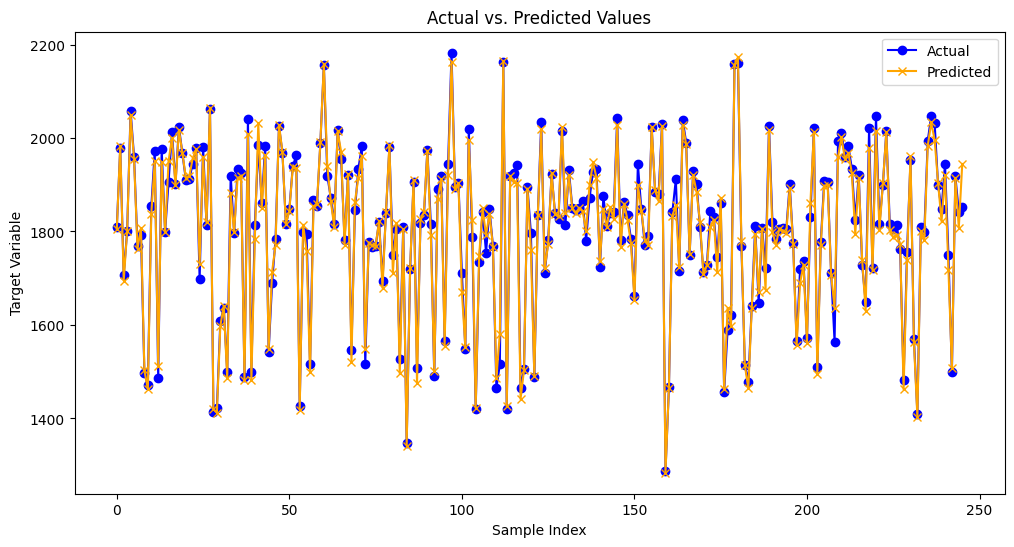

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', color='blue', marker='o')
plt.plot(y_pred_sarimax, label='Predicted', color='orange', marker='x')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Target Variable')
plt.legend()
plt.show()

Random search

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(1, 2, 5) RMSE=19.796


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 1, 0) RMSE=19.425
Random Search SARIMAX(3, 0, 5) RMSE=19.066


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(0, 2, 0) RMSE=3958.353


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(4, 0, 4) RMSE=19.073


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 2, 5) RMSE=19.325


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(4, 2, 2) RMSE=19.032


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(0, 2, 1) RMSE=22.262


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(2, 0, 2) RMSE=19.271


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 2, 3) RMSE=19.304


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 2, 1) RMSE=19.491


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(1, 1, 3) RMSE=19.054


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 2, 3) RMSE=19.304
Random Search SARIMAX(0, 0, 2) RMSE=19.050


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(0, 2, 5) RMSE=19.927


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 1, 1) RMSE=19.011
Random Search SARIMAX(0, 0, 5) RMSE=19.067


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 1, 3) RMSE=19.031
Random Search SARIMAX(3, 0, 5) RMSE=19.066


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(2, 2, 3) RMSE=18.978
Random Search SARIMAX(5, 0, 0) RMSE=19.064


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 1, 1) RMSE=19.011


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(0, 1, 5) RMSE=19.092


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 2, 0) RMSE=119.882


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 2, 2) RMSE=19.364
Random Search SARIMAX(3, 0, 3) RMSE=19.055


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(0, 1, 2) RMSE=19.053


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 1, 2) RMSE=19.010
Random Search SARIMAX(3, 0, 5) RMSE=19.066


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(2, 0, 5) RMSE=19.057


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(4, 2, 4) RMSE=19.769


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(2, 0, 4) RMSE=19.075


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(0, 2, 1) RMSE=22.262


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(4, 2, 4) RMSE=19.769
Random Search SARIMAX(5, 0, 5) RMSE=19.058


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(4, 2, 2) RMSE=19.032


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 2, 1) RMSE=19.239
Random Search SARIMAX(1, 0, 3) RMSE=19.068


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 2, 2) RMSE=19.364


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(1, 1, 1) RMSE=19.008


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 2, 2) RMSE=19.364


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(1, 1, 5) RMSE=19.050
Random Search SARIMAX(4, 0, 0) RMSE=19.070


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(0, 2, 5) RMSE=19.927


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 2, 0) RMSE=119.882


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(0, 2, 5) RMSE=19.927


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(0, 2, 5) RMSE=19.927


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(2, 1, 2) RMSE=19.042


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 0, 2) RMSE=19.197


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 2, 3) RMSE=19.304
Random Search SARIMAX(3, 0, 4) RMSE=19.060


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 1, 5) RMSE=19.047


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 1, 3) RMSE=19.930


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(2, 2, 2) RMSE=19.122


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(2, 1, 1) RMSE=19.026


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(2, 1, 3) RMSE=19.040


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 1, 1) RMSE=19.011


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(4, 0, 5) RMSE=19.043
Random Search SARIMAX(1, 0, 4) RMSE=19.074


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 2, 3) RMSE=19.101
Random Search SARIMAX(5, 0, 5) RMSE=19.058
Random Search SARIMAX(5, 0, 5) RMSE=19.058


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 2, 5) RMSE=19.325


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(1, 1, 2) RMSE=19.058
Random Search SARIMAX(1, 0, 4) RMSE=19.074


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(1, 2, 2) RMSE=21.706


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 0, 2) RMSE=19.003


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(4, 1, 1) RMSE=18.949


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(1, 1, 5) RMSE=19.050


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 1, 0) RMSE=19.266


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 1, 1) RMSE=19.014


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 1, 3) RMSE=19.031


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(4, 1, 2) RMSE=19.062


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 2, 2) RMSE=19.288
Random Search SARIMAX(5, 0, 0) RMSE=19.064


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(1, 1, 2) RMSE=19.058


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 1, 2) RMSE=19.058
Random Search SARIMAX(3, 0, 0) RMSE=19.075


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 1, 3) RMSE=19.930


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(2, 0, 1) RMSE=19.179
Random Search SARIMAX(0, 0, 5) RMSE=19.067


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 2, 4) RMSE=26.145


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(4, 0, 4) RMSE=19.073
Random Search SARIMAX(5, 0, 1) RMSE=19.061


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(0, 1, 2) RMSE=19.053


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 2, 1) RMSE=19.239


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(0, 1, 1) RMSE=19.030
Random Search SARIMAX(5, 0, 1) RMSE=19.061


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(1, 2, 1) RMSE=19.201


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(4, 0, 5) RMSE=19.043


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(0, 1, 2) RMSE=19.053


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(2, 0, 4) RMSE=19.075


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(0, 2, 1) RMSE=22.262
Random Search SARIMAX(5, 0, 0) RMSE=19.064
Random Search SARIMAX(4, 0, 0) RMSE=19.070


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(1, 1, 5) RMSE=19.050


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(2, 1, 5) RMSE=19.067


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 1, 5) RMSE=19.047


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 0, 2) RMSE=19.003
Random Search SARIMAX(3, 0, 1) RMSE=19.061
Best SARIMAX(4, 1, 1) RMSE=18.949


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


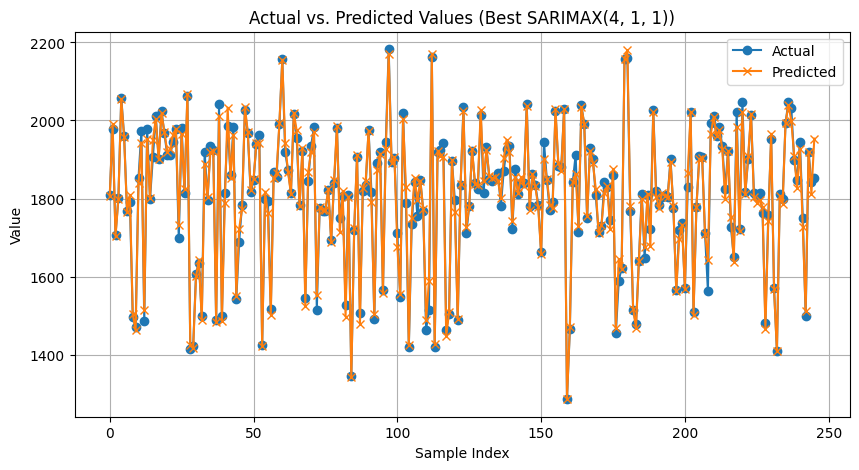

In [ ]:
import numpy as np
import pandas as pd
import random
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Assuming X_train, X_test, y_train, y_test are predefined numpy arrays
# Assuming feature_names is a list with your feature names

# Define the ranges for p, d, and q
p_range = range(0, 6)
d_range = range(0, 3)
q_range = range(0, 6)

# Set the number of iterations for random search
iterations = 100  # or any other number of iterations you want

best_score, best_order = float("inf"), None
best_params = {}

# Perform the random search
for i in range(iterations):
    p = random.choice(p_range)
    d = random.choice(d_range)
    q = random.choice(q_range)
    order = (p, d, q)

    try:
        # Fit the SARIMAX model (include exogenous variables if available)
        model = SARIMAX(y_train, exog=X_train, order=order, enforce_stationarity=False, enforce_invertibility=False)
        model_fit = model.fit(disp=False)

        # Predict (include exogenous variables if available)
        y_pred = model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, exog=X_test)

        # Calculate the error
        error = mean_squared_error(y_test, y_pred, squared=False)

        # Compare and store the best score
        if error < best_score:
            best_score, best_order = error, order
            best_params = {'p': p, 'd': d, 'q': q}

        print(f'Random Search SARIMAX{order} RMSE={error:.3f}')
    except Exception as e:
        print(f'Error with SARIMAX{order}: {e}')
        continue

print(f'Best SARIMAX{best_order} RMSE={best_score:.3f}')

# Fit the best SARIMAX model found via random search
best_model = SARIMAX(y_train, exog=X_train, order=best_order, enforce_stationarity=False, enforce_invertibility=False)
best_model_fit = best_model.fit(disp=False)

# Predict using the best model
y_pred_best = best_model_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1, exog=X_test)

# Plot the predictions of the best model
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_pred_best, label='Predicted', marker='x')
plt.title(f'Actual vs. Predicted Values (Best SARIMAX{best_order})')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


Best Arima for multivariate

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE: 18.949
MAE: 13.116
MAD: 13.116
MAPE: 0.737%


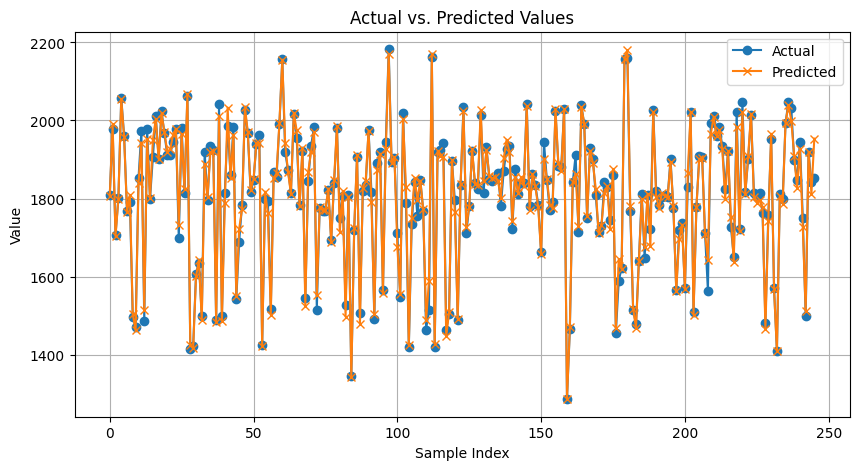

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming y_train and y_test are numpy arrays or pandas Series
# Assuming X_train and X_test are numpy arrays or pandas DataFrames corresponding to exogenous variables

# Best model parameters identified (p=5, d=0, q=2)
p, d, q = 4, 1, 1

# Fit the SARIMAX model using the best parameters
model = SARIMAX(y_train, order=(p, d, q), exog=X_train, enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit(disp=False)

# Make predictions using the fitted model
y_pred = model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, exog=X_test)

# Calculate error metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mad = np.mean(np.abs(y_test - y_pred))  # Mean Absolute Deviation
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # MAPE in percentage

# Print the error metrics
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"MAD: {mad:.3f}")
print(f"MAPE: {mape:.3f}%")


# Plot y_test against y_pred
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Save results to Excel
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df.to_excel('Arima_Multi_results_DS1.xlsx', index=False)

# **Stacking**

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value i

RMSE: 19.178028685163348
MAE: 13.339846900356166
MAD: 8.92039613783345
R-squared: 0.9880019117089598


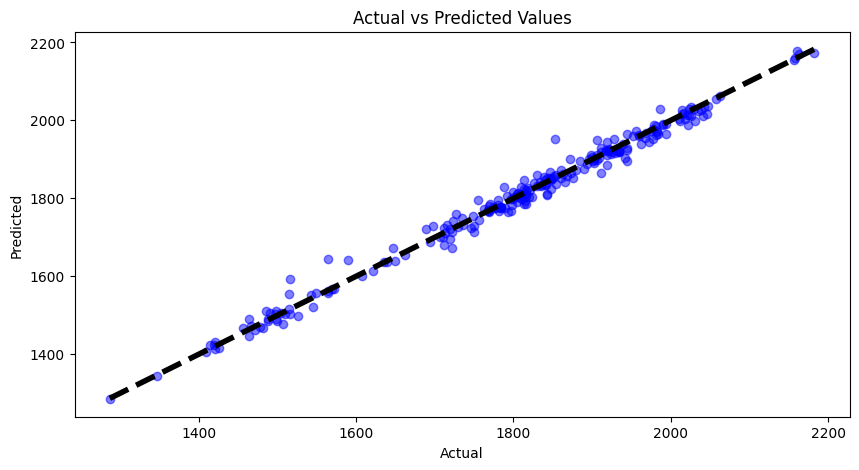

Results saved to Excel file 'Stacking_Results.xlsx'.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
from sklearn.base import BaseEstimator, RegressorMixin

# Define custom regressor for SARIMAX
class CustomSARIMAX(BaseEstimator, RegressorMixin):
    def __init__(self, order=(4, 1, 1), seasonal_order=(0, 0, 0, 0), exog=None):
        self.order = order
        self.seasonal_order = seasonal_order
        self.exog = exog

    def fit(self, X, y):
        self.model_ = SARIMAX(y, order=self.order, seasonal_order=self.seasonal_order, exog=X, enforce_stationarity=False, enforce_invertibility=False)
        self.model_fit_ = self.model_.fit(disp=False)
        return self

    def predict(self, X):
        return self.model_fit_.forecast(steps=len(X), exog=X)

# Define custom regressor for Polynomial Regression
class CustomPolynomialRegression(BaseEstimator, RegressorMixin):
    def __init__(self, degree=2):
        self.degree = degree

    def fit(self, X, y):
        self.model = make_pipeline(PolynomialFeatures(degree=self.degree), LinearRegression())
        self.model.fit(X, y)
        return self

    def predict(self, X):
        return self.model.predict(X)

# Create Gaussian Process Model
kernel = C(3.845, (1e-2, 1e2)) * RBF(9.607, (1e-2, 1e2))
gp_model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Initialize models
sarimax_model = CustomSARIMAX(order=(4, 1, 1))
poly_model = CustomPolynomialRegression(degree=2)
lr_model = LinearRegression()

# Define the stacking ensemble
stacked_model = StackingRegressor(
    estimators=[
        ('gp', gp_model),
        ('poly', poly_model),
        ('sarimax', sarimax_model),
        ('lr', lr_model)
    ],
    final_estimator=LinearRegression()
)

# Assuming you have defined X_train, X_test, y_train, y_test appropriately
# Fit the model
stacked_model.fit(X_train, y_train)
y_pred = stacked_model.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mad = median_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print('RMSE:', rmse)
print('MAE:', mae)
print('MAD:', mad)
print('R-squared:', r2)


plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# Save the results to an Excel file
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df.to_excel('Stacking_Results_ST_DS1.xlsx', index=False)
print("Results saved to Excel file 'Stacking_Results.xlsx'.")



with PCA

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value i

RMSE: 18.925914733164362
MAE: 13.205420613224025
MAD: 9.069697311631785
R-squared: 0.9883152914588077


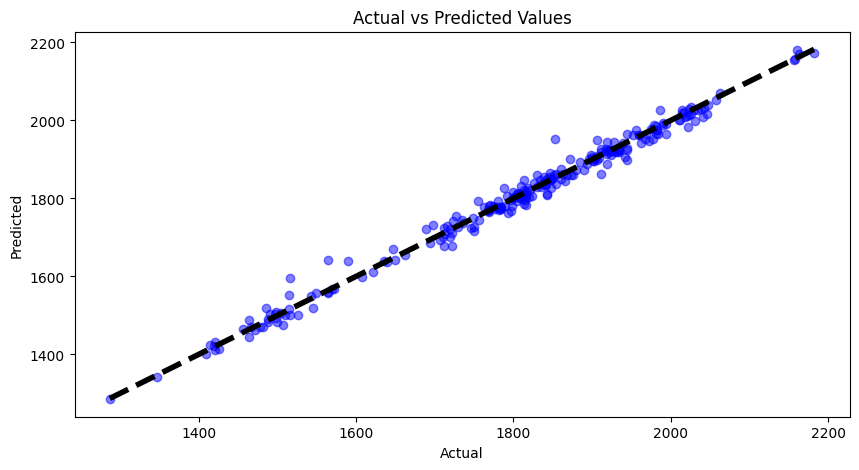

Results saved to Excel file 'Stacking_Results.xlsx'.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.ensemble import StackingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
from sklearn.base import BaseEstimator, RegressorMixin

# Custom SARIMAX model as before
class CustomSARIMAX(BaseEstimator, RegressorMixin):
    def __init__(self, order=(4, 1, 1), seasonal_order=(0, 0, 0, 0), exog=None):
        self.order = order
        self.seasonal_order = seasonal_order
        self.exog = exog

    def fit(self, X, y):
        self.model_ = SARIMAX(y, order=self.order, seasonal_order=self.seasonal_order, exog=X, enforce_stationarity=False, enforce_invertibility=False)
        self.model_fit_ = self.model_.fit(disp=False)
        return self

    def predict(self, X):
        return self.model_fit_.forecast(steps=len(X), exog=X)

# Custom Polynomial Regression with PCA
class CustomPCA_PolynomialRegression(BaseEstimator, RegressorMixin):
    def __init__(self, degree=2, n_components=None):
        self.degree = degree
        self.n_components = n_components

    def fit(self, X, y):
        self.model = Pipeline([
            ('pca', PCA(n_components=self.n_components)),
            ('poly', PolynomialFeatures(degree=self.degree)),
            ('linear', LinearRegression())
        ])
        self.model.fit(X, y)
        return self

    def predict(self, X):
        return self.model.predict(X)

# Gaussian Process Model
kernel = C(3.845, (1e-2, 1e2)) * RBF(9.607, (1e-2, 1e2))
gp_model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Initialize models
sarimax_model = CustomSARIMAX(order=(4, 1, 1))
poly_model = CustomPCA_PolynomialRegression(degree=2, n_components=10)
lr_model = LinearRegression()

# Stacking Ensemble
stacked_model = StackingRegressor(
    estimators=[
        ('gp', gp_model),
        ('poly', poly_model),
        ('sarimax', sarimax_model),
        ('lr', lr_model)
    ],
    final_estimator=LinearRegression()
)

# Assuming you have defined X_train, X_test, y_train, y_test appropriately
# Fit the model
stacked_model.fit(X_train, y_train)
y_pred = stacked_model.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mad = median_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print('RMSE:', rmse)
print('MAE:', mae)
print('MAD:', mad)
print('R-squared:', r2)



plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# Save the results to an Excel file
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df.to_excel('Stacking_Results_ST_with PCA_DS1.xlsx', index=False)
print("Results saved to Excel file 'Stacking_Results.xlsx'.")


### ***Machine Learning model ***

# **KNN**

In [ ]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.model_selection import train_test_split

# Function to calculate Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_index = (y_true != 0)
    y_true = y_true[non_zero_index]
    y_pred = y_pred[non_zero_index]
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


n_neighbors = [3, 5, 7, 9, 11, 13, 15, 17]
scores = {}

for n_neighbor in n_neighbors:
    # Initialize and train regressor
    knn = neighbors.KNeighborsRegressor(n_neighbors=n_neighbor)
    knn.fit(X_train, y_train)

    # Make predictions
    y_pred_knn = knn.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_knn))
    mae = mean_absolute_error(y_test, y_pred_knn)
    mad = median_absolute_error(y_test, y_pred_knn)
    mape = mean_absolute_percentage_error(y_test, y_pred_knn)

    # Store results in dictionary
    scores[n_neighbor] = {'RMSE': rmse, 'MAE': mae, 'MAD': mad, 'MAPE': mape}

# Display scores
for k, v in scores.items():
    print(f"Number of Neighbors: {k}")
    for score_name, score_value in v.items():
        print(f"{score_name}: {score_value:.2f}")
    print("")  # Newline for better readability


Number of Neighbors: 3
RMSE: 20.81
MAE: 13.62
MAD: 8.88
MAPE: 0.76

Number of Neighbors: 5
RMSE: 22.43
MAE: 15.42
MAD: 10.23
MAPE: 0.86

Number of Neighbors: 7
RMSE: 24.79
MAE: 17.44
MAD: 12.54
MAPE: 0.97

Number of Neighbors: 9
RMSE: 25.90
MAE: 18.69
MAD: 13.97
MAPE: 1.04

Number of Neighbors: 11
RMSE: 26.84
MAE: 19.49
MAD: 15.05
MAPE: 1.08

Number of Neighbors: 13
RMSE: 27.26
MAE: 19.75
MAD: 14.28
MAPE: 1.10

Number of Neighbors: 15
RMSE: 27.66
MAE: 20.37
MAD: 15.32
MAPE: 1.13

Number of Neighbors: 17
RMSE: 27.93
MAE: 20.56
MAD: 15.54
MAPE: 1.14



Random search

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint
import matplotlib.pyplot as plt
import pandas as pd

# Define a function for MAPE as it's not available in sklearn
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_index = y_true != 0
    y_true = y_true[non_zero_index]
    y_pred = y_pred[non_zero_index]
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Assuming X_train, X_test, y_train, y_test are already defined and preprocessed

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter range for RandomizedSearchCV
param_distributions = {
    'n_neighbors': randint(1, 31),  # Let's say we're testing n_neighbors between 1 and 30
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # p=1 for Manhattan, p=2 for Euclidean distance
}

# Create a KNN regressor object
knn = KNeighborsRegressor()

# Define RandomizedSearchCV
random_search = RandomizedSearchCV(
    knn,
    param_distributions=param_distributions,
    n_iter=20,  # Adjust based on how many iterations you want to perform
    scoring='neg_mean_squared_error',  # Negative MSE for optimization
    cv=5,  # 5-fold cross-validation
    verbose=1,
    random_state=42
)

# Execute the random search
random_search.fit(X_train_scaled, y_train)

# Best model found by random search
best_model = random_search.best_estimator_
print("Best parameters found:", random_search.best_params_)



Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found: {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}


Best KNN

RMSE: 19.724225783361177
MAE: 12.668578716285959
MAD: 8.75609741297103
MAPE: None%


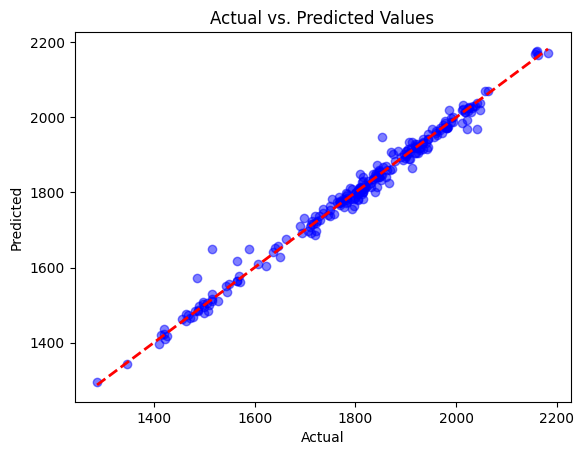

Results have been saved to Excel file 'KNN_Results_DS1.xlsx'.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
import matplotlib.pyplot as plt

def mean_absolute_percentage_error(y_true, y_pred):
    # Ensure the inputs are arrays to prevent unexpected 'scalar' behavior
    y_true, y_pred = np.array(y_true, ndmin=1), np.array(y_pred, ndmin=1)

    # Check if any of the arrays is unexpectedly scalar or zero-dimensional
    if y_true.ndim == 0 or y_pred.ndim == 0:
        raise ValueError("Input arrays should be one-dimensional or higher.")

    # Avoid division by zero
    mask = y_true != 0
    if not np.any(mask):  # If all values are zero, return NaN to avoid invalid calculations
        return np.nan




# Create KNN regressor with the best parameters
knn = KNeighborsRegressor(n_neighbors=2, p=2, weights='distance')

# Fit KNN model
knn.fit(X_train_scaled, y_train)

# Predict on the validation set
y_test_pred = knn.predict(X_test_scaled)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae = mean_absolute_error(y_test, y_test_pred)
mad = median_absolute_error(y_test, y_test_pred)
mape = mean_absolute_percentage_error(y_test, v)

# Output the evaluation metrics
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAD: {mad}")
print(f"MAPE: {mape}%")

# Plot actual vs. predicted values
plt.scatter(y_test, y_test_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

# Save the actual and predicted values to an Excel file
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
results_df.to_excel('KNN_Results_DS1.xlsx', index=False)

print("Results have been saved to Excel file 'KNN_Results_DS1.xlsx'.")


# **Decision Tree**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.model_selection import train_test_split

# Function to calculate Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_index = y_true != 0
    y_true = y_true[non_zero_index]
    y_pred = y_pred[non_zero_index]
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Parameters for Decision Tree
max_depths = [3, 5, 7, 9, 11, 13, 15, 17]  # Example max_depths, typically used to prevent overfitting
scores = {}

for max_depth in max_depths:
    # Initialize and train regressor
    dt = DecisionTreeRegressor(max_depth=max_depth)
    dt.fit(X_train, y_train)

    # Make predictions
    y_pred_dt = dt.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))
    mae = mean_absolute_error(y_test, y_pred_dt)
    mad = median_absolute_error(y_test, y_pred_dt)
    mape = mean_absolute_percentage_error(y_test, y_pred_dt)

    # Store results in dictionary
    scores[max_depth] = {'RMSE': rmse, 'MAE': mae, 'MAD': mad, 'MAPE': mape}

# Display scores
for depth, vals in scores.items():
    print(f"Max Depth: {depth}")
    for metric_name, metric_value in vals.items():
        print(f"{metric_name}: {metric_value:.2f}")
    print("")  # Newline for better readability


Max Depth: 3
RMSE: 37.41
MAE: 28.26
MAD: 21.80
MAPE: 1.57

Max Depth: 5
RMSE: 22.07
MAE: 16.02
MAD: 12.16
MAPE: 0.90

Max Depth: 7
RMSE: 24.25
MAE: 17.35
MAD: 12.86
MAPE: 0.97

Max Depth: 9
RMSE: 25.16
MAE: 17.90
MAD: 12.43
MAPE: 0.99

Max Depth: 11
RMSE: 25.93
MAE: 18.55
MAD: 13.04
MAPE: 1.03

Max Depth: 13
RMSE: 26.32
MAE: 18.80
MAD: 13.60
MAPE: 1.04

Max Depth: 15
RMSE: 26.19
MAE: 18.33
MAD: 12.85
MAPE: 1.02

Max Depth: 17
RMSE: 25.01
MAE: 17.95
MAD: 12.95
MAPE: 1.00



Random Search

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import make_scorer
from scipy.stats import randint

# Function to calculate Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_index = y_true != 0
    y_true = y_true[non_zero_index]
    y_pred = y_pred[non_zero_index]
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Define the parameter distributions to sample from
param_dist = {
    'max_depth': randint(3, 20),  # Depths from 3 to 20
    'min_samples_split': randint(2, 20),  # Minimum number of samples required to split
    'min_samples_leaf': randint(1, 20)   # Minimum number of samples required at each leaf node
}

# Create the random search with cross-validation
random_search = RandomizedSearchCV(
    estimator=DecisionTreeRegressor(),
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings sampled
    cv=5,        # 5-fold cross-validation
    scoring=make_scorer(mean_squared_error, greater_is_better=False),
    random_state=42,
    verbose=1
)

# Execute the random search
random_search.fit(X_train, y_train)

# Get the best model
best_model = random_search.best_estimator_

# Make predictions using the best model
y_pred_test = best_model.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae = mean_absolute_error(y_test, y_pred_test)
mad = median_absolute_error(y_test, y_pred_test)
mape = mean_absolute_percentage_error(y_test, y_pred_test)

# Output the evaluation metrics
print("Best parameters found:", random_search.best_params_)
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAD: {mad}")
print(f"MAPE: {mape}%")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 8}
RMSE: 21.920539416733206
MAE: 15.82446485903328
MAD: 12.15730837789647
MAPE: 0.8843695972936972%


Best Decision tree

Test RMSE: 21.922875505778016
Test MAE: 15.83105603208785
Test MAD: 12.15730837789647
Test MAPE: 0.884833035275762%


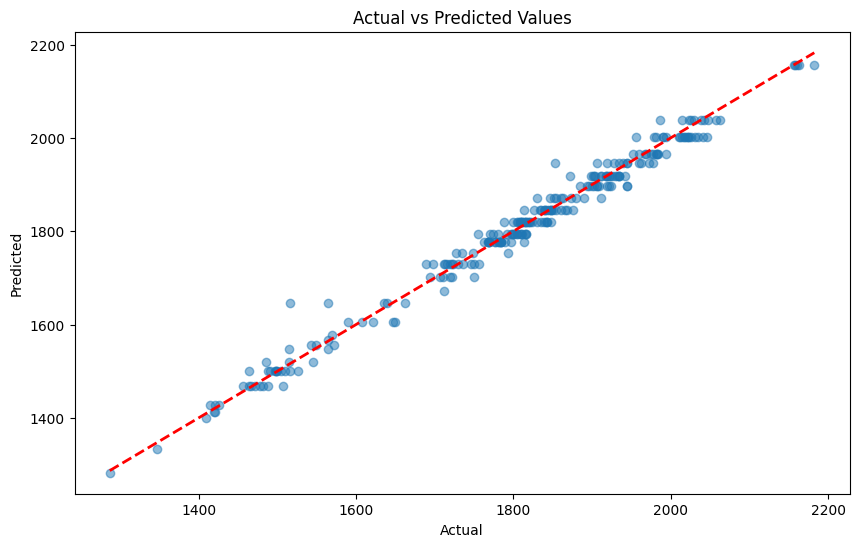

Results have been saved to Excel file 'DecisionTree_Results_DS1.xlsx'.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
import matplotlib.pyplot as plt

# Function to calculate Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_index = y_true != 0
    y_true = y_true[non_zero_index]
    y_pred = y_pred[non_zero_index]
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Create the Decision Tree Regressor with specified best parameters
dt_regressor = DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=8)

# Assuming X_train, y_train, X_test, y_test are already defined
# Fit the model on the training data
dt_regressor.fit(X_train, y_train)

# Predict on the test data
y_test_pred = dt_regressor.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae = mean_absolute_error(y_test, y_test_pred)
mad = median_absolute_error(y_test, y_test_pred)
mape = mean_absolute_percentage_error(y_test, y_test_pred)

# Output the evaluation metrics
print(f"Test RMSE: {rmse}")
print(f"Test MAE: {mae}")
print(f"Test MAD: {mad}")
print(f"Test MAPE: {mape}%")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# Save the actual and predicted values to an Excel file
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
results_df.to_excel('DecisionTree_Results_DS1.xlsx', index=False)

print("Results have been saved to Excel file 'DecisionTree_Results_DS1.xlsx'.")


# **SVR**

Test RMSE: 21.09585600775963
Test MAE: 14.439618681104289
Test MAD: 10.29010884888362
Test MAPE: 0.8146234485287708%


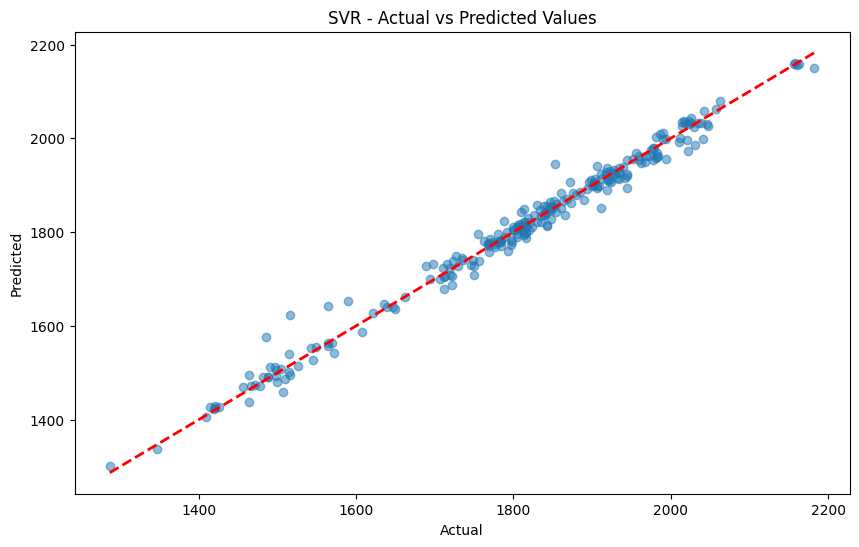

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
import matplotlib.pyplot as plt

# Function to calculate Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_index = y_true != 0
    y_true = y_true[non_zero_index]
    y_pred = y_pred[non_zero_index]
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Assuming X_train, y_train, X_test, y_test are already defined and split
# Standardizing data - very important for SVR
scaler_x = StandardScaler()
X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()

# Define and configure the SVR model
# Note: Hyperparameters should be chosen based on a previous analysis such as using GridSearchCV or RandomizedSearchCV
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # Example parameters

# Fit the model on the training data
svr_model.fit(X_train_scaled, y_train_scaled)

# Predict on the test data
y_test_pred_scaled = svr_model.predict(X_test_scaled)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae = mean_absolute_error(y_test, y_test_pred)
mad = median_absolute_error(y_test, y_test_pred)
mape = mean_absolute_percentage_error(y_test, y_test_pred)

# Output the evaluation metrics
print(f"Test RMSE: {rmse}")
print(f"Test MAE: {mae}")
print(f"Test MAD: {mad}")
print(f"Test MAPE: {mape}%")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVR - Actual vs Predicted Values')
plt.show()






Random search

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END C=0.31489116479568624, epsilon=0.07114476009343425, gamma=0.015702970884055395; total time=   0.0s
[CV] END C=0.31489116479568624, epsilon=0.07114476009343425, gamma=0.015702970884055395; total time=   0.0s
[CV] END C=0.31489116479568624, epsilon=0.07114476009343425, gamma=0.015702970884055395; total time=   0.0s
[CV] END C=0.31489116479568624, epsilon=0.07114476009343425, gamma=0.015702970884055395; total time=   0.0s
[CV] END C=0.31489116479568624, epsilon=0.07114476009343425, gamma=0.015702970884055395; total time=   0.0s
[CV] END C=2.481040974867813, epsilon=0.00029380279387035364, gamma=0.00029375384576328325; total time=   0.1s
[CV] END C=2.481040974867813, epsilon=0.00029380279387035364, gamma=0.00029375384576328325; total time=   0.1s
[CV] END C=2.481040974867813, epsilon=0.00029380279387035364, gamma=0.00029375384576328325; total time=   0.1s
[CV] END C=2.481040974867813, epsilon=0.00029380279387035364, ga

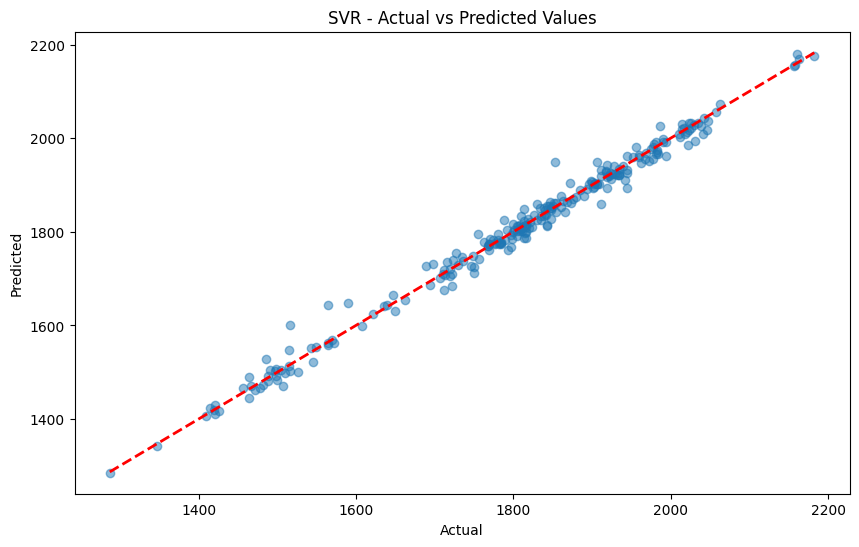

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, make_scorer
from scipy.stats import loguniform, randint
import matplotlib.pyplot as plt

# Function to calculate Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_index = y_true != 0
    y_true = y_true[non_zero_index]
    y_pred = y_pred[non_zero_index]
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Standardize the data
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()

# Define the parameter distributions to sample from
param_dist = {
    'C': loguniform(1e-2, 1e2),  # Regularization parameter
    'gamma': loguniform(1e-4, 1e-1),  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
    'epsilon': loguniform(1e-4, 1e-1)  # Epsilon in the epsilon-SVR model
}

# Create the random search with cross-validation
random_search = RandomizedSearchCV(
    estimator=SVR(kernel='rbf'),
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings sampled
    cv=5,        # 5-fold cross-validation
    scoring=make_scorer(mean_squared_error, greater_is_better=False),
    verbose=2,
    random_state=42
)

# Execute the random search
random_search.fit(X_train_scaled, y_train_scaled)

# Best model found by random search
best_model = random_search.best_estimator_

# Make predictions using the best model on the test set
y_test_pred_scaled = best_model.predict(X_test_scaled)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae = mean_absolute_error(y_test, y_test_pred)
mad = median_absolute_error(y_test, y_test_pred)
mape = mean_absolute_percentage_error(y_test, y_test_pred)

# Output the evaluation metrics
print("Best parameters found:", random_search.best_params_)
print(f"Test RMSE: {rmse}")
print(f"Test MAE: {mae}")
print(f"Test MAD: {mad}")
print(f"Test MAPE: {mape}%")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVR - Actual vs Predicted Values')
plt.show()



Best SVR

Test RMSE: 19.027527781461295
Test MAE: 12.940222579991387
Test MAD: 8.624867807482588
Test MAPE: 0.7291426507057721%


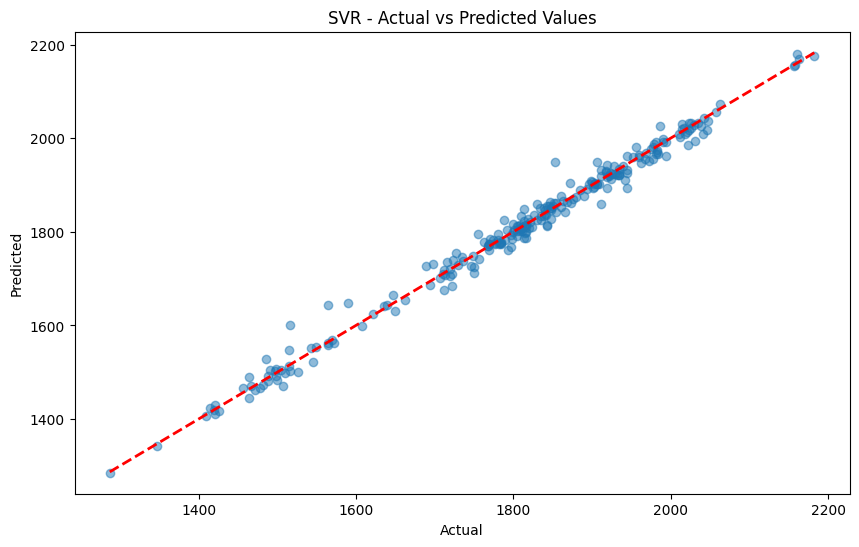

Results have been saved to Excel file 'SVR_Results_DS1.xlsx'.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, make_scorer
from scipy.stats import loguniform, randint
import matplotlib.pyplot as plt

# Function to calculate Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_index = y_true != 0
    y_true = y_true[non_zero_index]
    y_pred = y_pred[non_zero_index]
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Standardize the data
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()

svr_model = SVR(C=88.62326508576255, epsilon=0.020736445177905044, gamma=0.00039459088111000007)

# Fit the model on the training data
svr_model.fit(X_train_scaled, y_train_scaled)

# Predict on the test data
y_test_pred_scaled = svr_model.predict(X_test_scaled)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae = mean_absolute_error(y_test, y_test_pred)
mad = median_absolute_error(y_test, y_test_pred)
mape = mean_absolute_percentage_error(y_test, y_test_pred)

# Output the evaluation metrics
print(f"Test RMSE: {rmse}")
print(f"Test MAE: {mae}")
print(f"Test MAD: {mad}")
print(f"Test MAPE: {mape}%")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVR - Actual vs Predicted Values')
plt.show()

# Save the actual and predicted values to an Excel file
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
results_df.to_excel('SVR_Results_DS1.xlsx', index=False)

print("Results have been saved to Excel file 'SVR_Results_DS1.xlsx'.")

# **Stacking**

RMSE: 18.8963
MAE: 12.3529
MAD: 8.4944
MAPE: -0.6970%


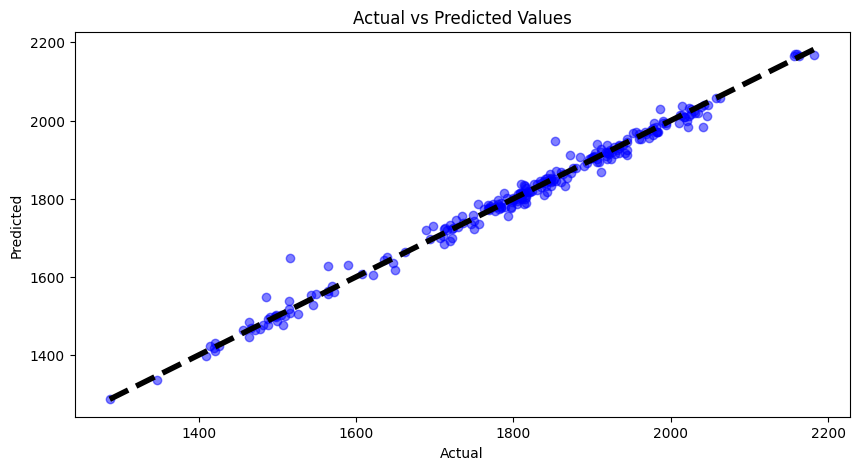

Results saved to Excel file 'Stacking_Results.xlsx'.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, RegressorMixin

# Define a custom class to calculate MAPE, since it's not directly available in sklearn
class MAPE(BaseEstimator, RegressorMixin):
    def __init__(self):
        pass

    def fit(self, X, y):
        return self

    def predict(self, X):
        # Dummy prediction method, actual implementation is not necessary for the metric calculation
        pass

    def score(self, y_true, y_pred):
        epsilon = np.finfo(np.float64).eps  # To avoid division by zero
        mape = np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100
        return -mape  # Negative MAPE for consistency with other score methods that assume 'higher is better'

# Load or define your data here
# X_train, X_test, y_train, y_test = ...

# Decision Tree with optimized parameters
decision_tree = DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=8)

# KNN with optimized parameters
knn = KNeighborsRegressor(n_neighbors=2, p=2, weights='distance')

# SVR with optimized parameters
svr = make_pipeline(StandardScaler(), SVR(C=88.623, epsilon=0.0207, gamma=0.000394))

# Stacking Ensemble
stacked_model = StackingRegressor(
    estimators=[
        ('knn', knn),
        ('decision_tree', decision_tree),
        ('svr', svr)
    ],
    final_estimator=LinearRegression()
)

# Fit the stacking ensemble
stacked_model.fit(X_train, y_train)

# Predictions
y_pred = stacked_model.predict(X_test)

# Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mad = median_absolute_error(y_test, y_pred)
mape = MAPE().score(y_test, y_pred)  # Using the custom MAPE scorer

# Output the results
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'MAD: {mad:.4f}')
print(f'MAPE: {mape:.4f}%')

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# Save the results to an Excel file
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df.to_excel('Stacking_Results_ML_DS1.xlsx', index=False)
print("Results saved to Excel file 'Stacking_Results.xlsx'.")


with PCA

RMSE: 18.4848
MAE: 12.1051
MAD: 8.1582
MAPE: -0.6809%


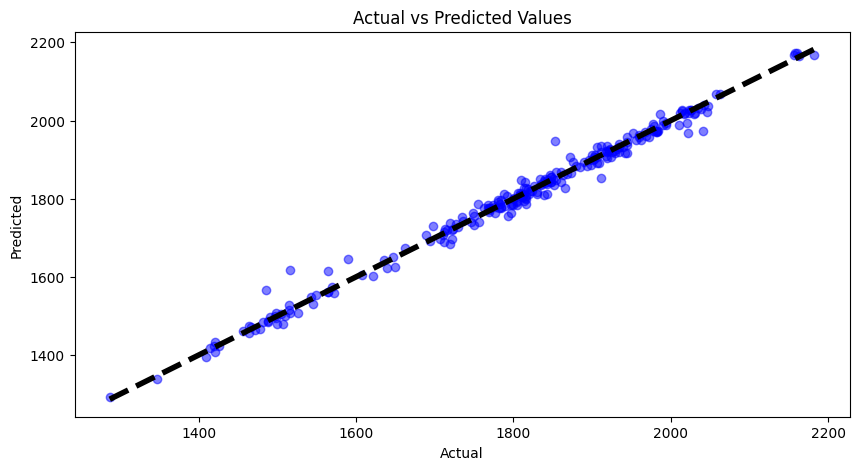

Results saved to Excel file 'Stacking_Results.xlsx'.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA  # Corrected import
from sklearn.linear_model import LinearRegression
from sklearn.base import BaseEstimator, RegressorMixin

class MAPE(BaseEstimator, RegressorMixin):
    def __init__(self):
        pass

    def fit(self, X, y):
        return self

    def predict(self, X):
        pass  # Dummy, not used

    def score(self, y_true, y_pred):
        epsilon = np.finfo(np.float64).eps
        mape = np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100
        return -mape

# Example data preparation
# X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

n_components = 15  # Number of PCA components to keep

decision_tree = make_pipeline(PCA(n_components=n_components),
                              DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=8))

knn = make_pipeline(StandardScaler(), PCA(n_components=n_components),
                    KNeighborsRegressor(n_neighbors=2, p=2, weights='distance'))

svr = make_pipeline(StandardScaler(), PCA(n_components=n_components),
                    SVR(C=88.623, epsilon=0.0207, gamma=0.000394))

stacked_model = StackingRegressor(
    estimators=[
        ('knn', knn),
        ('decision_tree', decision_tree),
        ('svr', svr)
    ],
    final_estimator=LinearRegression()
)

stacked_model.fit(X_train, y_train)
y_pred = stacked_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mad = median_absolute_error(y_test, y_pred)
mape = MAPE().score(y_test, y_pred)

print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'MAD: {mad:.4f}')
print(f'MAPE: {mape:.4f}%')

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# Save the results to an Excel file
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df.to_excel('Stacking_Results_ML_with PCA_DS1.xlsx', index=False)
print("Results saved to Excel file 'Stacking_Results.xlsx'.")



# **Deep Learning**

In [ ]:
# normalize your data for GRU
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(train_df)

In [ ]:
lag = 24  # Number of hours to use as input to predict the next hour
n_obs = 983  # Adjust this if needed based on your dataset size after preprocessing
features = 31  # Total number of features included

X_train = []
y_train = []

# Ensure you're selecting all features for X_train and only the PM2.5 values for y_train
for i in range(lag, n_obs):
    X_train.append(training_set_scaled[i-lag:i, :])  # Include all features in the lagged window
    y_train.append(training_set_scaled[i, 0])  # Assuming PM2.5 is the first feature for prediction

# Convert lists to numpy arrays for training the GRU
X_train, y_train = np.array(X_train), np.array(y_train)

# Now, X_train should have the shape [samples, timesteps, features]
print(X_train.shape)  # Expected shape: (number of samples, lag, features)

(959, 24, 31)


# **GRU**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()

# Adding the first GRU layer with 200 units
model.add(GRU(units=200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding a second GRU layer with 100 units
model.add(GRU(units=100, return_sequences=True))
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding the third GRU layer with 50 units, return_sequences=True allows stacking another GRU layer
model.add(GRU(units=50, return_sequences=True))
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding the last GRU layer with 50 units
model.add(GRU(units=50))  # This is the last GRU layer, so return_sequences is not needed
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding the output layer
model.add(Dense(units=1))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_14 (GRU)                (None, 24, 200)           139800    
                                                                 
 dropout_14 (Dropout)        (None, 24, 200)           0         
                                                                 
 gru_15 (GRU)                (None, 24, 100)           90600     
                                                                 
 dropout_15 (Dropout)        (None, 24, 100)           0         
                                                                 
 gru_16 (GRU)                (None, 24, 50)            22800     
                                                                 
 dropout_16 (Dropout)        (None, 24, 50)            0         
                                                                 
 gru_17 (GRU)                (None, 50)               

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

# Assuming X_train and y_train are already prepared
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
30/30 [==============================] - 13s 106ms/step - loss: 0.0666
Epoch 2/50
30/30 [==============================] - 3s 107ms/step - loss: 0.0438
Epoch 3/50
30/30 [==============================] - 5s 155ms/step - loss: 0.0410
Epoch 4/50
30/30 [==============================] - 3s 108ms/step - loss: 0.0387
Epoch 5/50
30/30 [==============================] - 3s 107ms/step - loss: 0.0403
Epoch 6/50
30/30 [==============================] - 3s 110ms/step - loss: 0.0395
Epoch 7/50
30/30 [==============================] - 4s 147ms/step - loss: 0.0397
Epoch 8/50
30/30 [==============================] - 3s 106ms/step - loss: 0.0385
Epoch 9/50
30/30 [==============================] - 3s 107ms/step - loss: 0.0388
Epoch 10/50
30/30 [==============================] - 4s 141ms/step - loss: 0.0374
Epoch 11/50
30/30 [==============================] - 4s 116ms/step - loss: 0.0376
Epoch 12/50
30/30 [==============================] - 3s 106ms/step - loss: 0.0380
Epoch 13/50
30/30 [=====

In [ ]:
test_features_scaled = sc.transform(test_df)

# Prepare sequences for testing
X_test = []
for i in range(lag, len(test_features_scaled)):
    X_test.append(test_features_scaled[i-lag:i])  # Use all features

X_test = np.array(X_test)


# Make predictions
y_pred = model.predict(X_test)



7/7 [==============================] - 3s 58ms/step


In [ ]:

pred_full = np.zeros((y_pred.shape[0], 31))  # 31 for the number of features you have

# Assuming Y is the first column, fill in your predictions there
pred_full[:, 0] = y_pred.ravel()  # Use ravel() to ensure it's a 1D array

# Perform the inverse transformation
pred_full_inverse = sc.inverse_transform(pred_full)

# Extract the Y predictions after inverse transforming
y_pred_inverse = pred_full_inverse[:, 0]

In [ ]:
# Assuming dataset_test is your test DataFrame and it's already preprocessed to drop NaNs as before
real_y = test_df['Y'].values[-len(y_pred):]  # Make sure to align the lengths

# Ensure it is properly shaped for comparison
# If necessary, reshape it (though it should already be a 1D array matching y_pred_inverse in length)
real_y = real_y.reshape(-1, 1)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(real_y, y_pred_inverse))

# Calculate MAE
mae = mean_absolute_error(real_y, y_pred_inverse)

# Calculate MAD
mad = np.mean(np.abs(real_y - y_pred_inverse))

# Calculate MAPE - Note: You have to ensure it does not contain zeros to avoid division by zero
mape = np.mean(np.abs((real_y - y_pred_inverse) / real_y)) * 100

# Calculate R-squared
r2 = r2_score(real_y, y_pred_inverse)

# Print the results
print('RMSE: {:.4f}'.format(rmse))
print('MAE: {:.4f}'.format(mae))
print('MAD: {:.4f}'.format(mad))
print('MAPE: {:.4f}%'.format(mape))
print('R-squared: {:.4f}'.format(r2))

RMSE: 175.2666
MAE: 133.1060
MAD: 133.6485
MAPE: 7.8023%
R-squared: 0.0020


Random search

In [ ]:
pip install scikeras


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 24.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.2.1 which is incompatible.


In [ ]:
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense

# Function to create the model, adjusted for use with Scikeras
def create_model(gru_units1=200, gru_units2=100, gru_units3=50, gru_units4=50, dropout_rate=0.1):
    model = Sequential([
        GRU(units=gru_units1, return_sequences=True, input_shape=(None, 31)),  # Modify '30' to match your feature count
        Dropout(rate=dropout_rate),
        GRU(units=gru_units2, return_sequences=True),
        Dropout(rate=dropout_rate),
        GRU(units=gru_units3, return_sequences=True),
        Dropout(rate=dropout_rate),
        GRU(units=gru_units4),
        Dropout(rate=dropout_rate),
        Dense(units=1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Wrap the model using Scikeras
model = KerasRegressor(model=create_model, epochs=5, batch_size=32)



In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Parameter grid
param_dist = {
    'model__gru_units1': [100, 200, 300],
    'model__gru_units2': [50, 100, 150],
    'model__gru_units3': [25, 50, 75],
    'model__gru_units4': [25, 50],
    'model__dropout_rate': [0.1, 0.2, 0.3, 0.4, 0.5]
}

# Randomized search setup
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42,
    scoring='neg_mean_squared_error'
)

# Execute random search
random_search.fit(X_train, y_train)

# Display the best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best score (neg_mean_squared_error):", random_search.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 118ms/step - loss: 0.1957
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - loss: 0.0458
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 187ms/step - loss: 0.0419
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - loss: 0.0410
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - loss: 0.0426
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
[CV] END model__dropout_rate=0.1, model__gru_units1=200, model__gru_units2=150, model__gru_units3=25, model__gru_units4=25; total time=  26.5s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 118ms/step - loss: 0.2450
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - loss: 0.0458
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - loss: 0.0434
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 182ms/step - loss: 0.0429
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - loss: 0.0408
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
[CV] END model__dropout_rate=0.1, model__gru_units1=200, model__gru_units2=150, model__gru_units3=25, model__gru_units4=25; total time=  25.4s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - loss: 0.1945
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - loss: 0.0452
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - loss: 0.0411
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0448
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - loss: 0.0442
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step
[CV] END model__dropout_rate=0.1, model__gru_units1=200, model__gru_units2=150, model__gru_units3=25, model__gru_units4=25; total time=  24.7s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step - loss: 0.1773
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0589
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.0552
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 0.0573
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0521
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
[CV] END model__dropout_rate=0.3, model__gru_units1=100, model__gru_units2=100, model__gru_units3=50, model__gru_units4=25; total time=  20.3s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 73ms/step - loss: 0.1200
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0591
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0537
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 0.0460
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0481
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
[CV] END model__dropout_rate=0.3, model__gru_units1=100, model__gru_units2=100, model__gru_units3=50, model__gru_units4=25; total time=  20.7s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 0.1396
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0578
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0492
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0523
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0472
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step
[CV] END model__dropout_rate=0.3, model__gru_units1=100, model__gru_units2=100, model__gru_units3=50, model__gru_units4=25; total time=  14.7s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 147ms/step - loss: 0.1178
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - loss: 0.0588
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - loss: 0.0444
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - loss: 0.0509
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - loss: 0.0458
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
[CV] END model__dropout_rate=0.2, model__gru_units1=200, model__gru_units2=100, model__gru_units3=25, model__gru_units4=50; total time=  21.5s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - loss: 0.1180
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0431
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step - loss: 0.0458
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 147ms/step - loss: 0.0464
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 0.0448
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
[CV] END model__dropout_rate=0.2, model__gru_units1=200, model__gru_units2=100, model__gru_units3=25, model__gru_units4=50; total time=  22.4s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step - loss: 0.1174
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 0.0492
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - loss: 0.0453
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 0.0432
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 156ms/step - loss: 0.0465
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step
[CV] END model__dropout_rate=0.2, model__gru_units1=200, model__gru_units2=100, model__gru_units3=25, model__gru_units4=50; total time=  22.5s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 144ms/step - loss: 0.1192
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - loss: 0.0605
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - loss: 0.0501
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - loss: 0.0499
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - loss: 0.0459
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
[CV] END model__dropout_rate=0.3, model__gru_units1=200, model__gru_units2=50, model__gru_units3=25, model__gru_units4=50; total time=  25.8s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step - loss: 0.1578
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - loss: 0.0611
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 0.0497
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 0.0512
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - loss: 0.0452
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
[CV] END model__dropout_rate=0.3, model__gru_units1=200, model__gru_units2=50, model__gru_units3=25, model__gru_units4=50; total time=  21.9s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - loss: 0.0949
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 0.0487
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 0.0441
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0442
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 0.0533
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step
[CV] END model__dropout_rate=0.3, model__gru_units1=200, model__gru_units2=50, model__gru_units3=25, model__gru_units4=50; total time=  20.5s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 122ms/step - loss: 0.2103
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - loss: 0.0719
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 185ms/step - loss: 0.0683
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - loss: 0.0581
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - loss: 0.0546
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
[CV] END model__dropout_rate=0.4, model__gru_units1=200, model__gru_units2=150, model__gru_units3=75, model__gru_units4=25; total time=  24.8s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 121ms/step - loss: 0.3231
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - loss: 0.0812
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 186ms/step - loss: 0.0610
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - loss: 0.0602
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - loss: 0.0549
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
[CV] END model__dropout_rate=0.4, model__gru_units1=200, model__gru_units2=150, model__gru_units3=75, model__gru_units4=25; total time=  25.2s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 114ms/step - loss: 0.3214
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - loss: 0.0661
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - loss: 0.0618
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 180ms/step - loss: 0.0514
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - loss: 0.0536
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step
[CV] END model__dropout_rate=0.4, model__gru_units1=200, model__gru_units2=150, model__gru_units3=75, model__gru_units4=25; total time=  23.2s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - loss: 0.1348
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - loss: 0.0526
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0463
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 175ms/step - loss: 0.0513
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - loss: 0.0480
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
[CV] END model__dropout_rate=0.3, model__gru_units1=200, model__gru_units2=100, model__gru_units3=75, model__gru_units4=50; total time=  22.1s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 135ms/step - loss: 0.1098
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - loss: 0.0575
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0523
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 149ms/step - loss: 0.0450
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - loss: 0.0428
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
[CV] END model__dropout_rate=0.3, model__gru_units1=200, model__gru_units2=100, model__gru_units3=75, model__gru_units4=50; total time=  26.7s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 129ms/step - loss: 0.2174
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - loss: 0.0508
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - loss: 0.0507
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - loss: 0.0437
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - loss: 0.0457
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step
[CV] END model__dropout_rate=0.3, model__gru_units1=200, model__gru_units2=100, model__gru_units3=75, model__gru_units4=50; total time=  23.2s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 198ms/step - loss: 0.1559
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step - loss: 0.0558
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 179ms/step - loss: 0.0591
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 138ms/step - loss: 0.0564
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 189ms/step - loss: 0.0540
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
[CV] END model__dropout_rate=0.4, model__gru_units1=300, model__gru_units2=100, model__gru_units3=75, model__gru_units4=50; total time=  35.9s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 203ms/step - loss: 0.1325
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - loss: 0.0650
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - loss: 0.0551
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 149ms/step - loss: 0.0512
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - loss: 0.0562
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
[CV] END model__dropout_rate=0.4, model__gru_units1=300, model__gru_units2=100, model__gru_units3=75, model__gru_units4=50; total time=  31.0s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - loss: 0.2176
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 150ms/step - loss: 0.0613
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - loss: 0.0524
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - loss: 0.0484
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - loss: 0.0508
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step
[CV] END model__dropout_rate=0.4, model__gru_units1=300, model__gru_units2=100, model__gru_units3=75, model__gru_units4=50; total time=  29.4s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 200ms/step - loss: 0.2093
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - loss: 0.0493
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step - loss: 0.0435
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 203ms/step - loss: 0.0416
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step - loss: 0.0371
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step
[CV] END model__dropout_rate=0.1, model__gru_units1=300, model__gru_units2=100, model__gru_units3=50, model__gru_units4=50; total time=  29.2s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 139ms/step - loss: 0.1324
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - loss: 0.0467
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 196ms/step - loss: 0.0425
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 138ms/step - loss: 0.0420
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - loss: 0.0427
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
[CV] END model__dropout_rate=0.1, model__gru_units1=300, model__gru_units2=100, model__gru_units3=50, model__gru_units4=50; total time=  32.5s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 190ms/step - loss: 0.1728
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - loss: 0.0406
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - loss: 0.0421
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 170ms/step - loss: 0.0428
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - loss: 0.0433
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step
[CV] END model__dropout_rate=0.1, model__gru_units1=300, model__gru_units2=100, model__gru_units3=50, model__gru_units4=50; total time=  29.2s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 149ms/step - loss: 0.2596
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 153ms/step - loss: 0.0583
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 281ms/step - loss: 0.0599
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 198ms/step - loss: 0.0515
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 196ms/step - loss: 0.0495
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step
[CV] END model__dropout_rate=0.3, model__gru_units1=300, model__gru_units2=150, model__gru_units3=50, model__gru_units4=25; total time=  37.9s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 150ms/step - loss: 0.1729
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 150ms/step - loss: 0.0632
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 180ms/step - loss: 0.0550
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 174ms/step - loss: 0.0490
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 154ms/step - loss: 0.0530
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
[CV] END model__dropout_rate=0.3, model__gru_units1=300, model__gru_units2=150, model__gru_units3=50, model__gru_units4=25; total time=  28.9s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 139ms/step - loss: 0.2484
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - loss: 0.0576
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 195ms/step - loss: 0.0527
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step - loss: 0.0582
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - loss: 0.0498
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step
[CV] END model__dropout_rate=0.3, model__gru_units1=300, model__gru_units2=150, model__gru_units3=50, model__gru_units4=25; total time=  30.1s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 187ms/step - loss: 0.1756
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - loss: 0.0695
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0592
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - loss: 0.0537
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 185ms/step - loss: 0.0549
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
[CV] END model__dropout_rate=0.5, model__gru_units1=200, model__gru_units2=150, model__gru_units3=25, model__gru_units4=50; total time=  26.4s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 177ms/step - loss: 0.1831
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - loss: 0.0842
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - loss: 0.0631
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - loss: 0.0631
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - loss: 0.0578
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
[CV] END model__dropout_rate=0.5, model__gru_units1=200, model__gru_units2=150, model__gru_units3=25, model__gru_units4=50; total time=  26.6s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 144ms/step - loss: 0.1704
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - loss: 0.0743
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - loss: 0.0682
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - loss: 0.0520
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 169ms/step - loss: 0.0547
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step
[CV] END model__dropout_rate=0.5, model__gru_units1=200, model__gru_units2=150, model__gru_units3=25, model__gru_units4=50; total time=  25.2s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 141ms/step - loss: 0.1632
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 181ms/step - loss: 0.0618
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 141ms/step - loss: 0.0479
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 139ms/step - loss: 0.0477
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 181ms/step - loss: 0.0488
Best parameters found:  {'model__gru_units4': 50, 'model__gru_units3': 75, 'model__gru_units2': 100, 'model__gru_units1': 300, 'model__dropout_rate': 0.4}
Best score (neg_mean_squared_error): -0.03633121775313924


In [ ]:
X_train.shape

(983, 30)

Best GRU

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense, Input

# Define the best parameters
best_params = {
    'gru_units1': 300,
    'gru_units2': 100,
    'gru_units3': 75,
    'gru_units4': 50,
    'dropout_rate': 0.4
}

# Create the GRU model with the best parameters
def create_best_model():
    model = Sequential([
        Input(shape=(24, 31)),  # Adjust the input shape based on your data
        GRU(units=best_params['gru_units1'], return_sequences=True),
        Dropout(best_params['dropout_rate']),
        GRU(units=best_params['gru_units2'], return_sequences=True),
        Dropout(best_params['dropout_rate']),
        GRU(units=best_params['gru_units3'], return_sequences=True),
        Dropout(best_params['dropout_rate']),
        GRU(units=best_params['gru_units4']),
        Dropout(best_params['dropout_rate']),
        Dense(1)  # Adjust the output layer depending on your prediction task
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the model
model = create_best_model()

# Print the model summary
model.summary()

# Example: Train the model
# Please ensure X_train and y_train are prepared according to your dataset's needs
# model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)  # Uncomment to train


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_12 (GRU)                (None, 24, 300)           299700    
                                                                 
 dropout_27 (Dropout)        (None, 24, 300)           0         
                                                                 
 gru_13 (GRU)                (None, 24, 100)           120600    
                                                                 
 dropout_28 (Dropout)        (None, 24, 100)           0         
                                                                 
 gru_14 (GRU)                (None, 24, 75)            39825     
                                                                 
 dropout_29 (Dropout)        (None, 24, 75)            0         
                                                                 
 gru_15 (GRU)                (None, 50)               

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
30/30 [==============================] - 14s 183ms/step - loss: 0.0928
Epoch 2/50
30/30 [==============================] - 4s 143ms/step - loss: 0.0551
Epoch 3/50
30/30 [==============================] - 4s 141ms/step - loss: 0.0520
Epoch 4/50
30/30 [==============================] - 6s 186ms/step - loss: 0.0483
Epoch 5/50
30/30 [==============================] - 4s 139ms/step - loss: 0.0478
Epoch 6/50
30/30 [==============================] - 4s 144ms/step - loss: 0.0463
Epoch 7/50
30/30 [==============================] - 5s 174ms/step - loss: 0.0453
Epoch 8/50
30/30 [==============================] - 4s 138ms/step - loss: 0.0433
Epoch 9/50
30/30 [==============================] - 5s 170ms/step - loss: 0.0435
Epoch 10/50
30/30 [==============================] - 5s 146ms/step - loss: 0.0417
Epoch 11/50
30/30 [==============================] - 4s 138ms/step - loss: 0.0434
Epoch 12/50
30/30 [==============================] - 5s 183ms/step - loss: 0.0432
Epoch 13/50
30/30 [=====

In [ ]:
test_features_scaled = sc.transform(test_df)

# Prepare sequences for testing
X_test = []
for i in range(lag, len(test_features_scaled)):
    X_test.append(test_features_scaled[i-lag:i])  # Use all features

X_test = np.array(X_test)


# Make predictions
y_pred = model.predict(X_test)



7/7 [==============================] - 2s 44ms/step


In [ ]:

pred_full = np.zeros((y_pred.shape[0], 31))  # 31 for the number of features you have

# Assuming Y is the first column, fill in your predictions there
pred_full[:, 0] = y_pred.ravel()  # Use ravel() to ensure it's a 1D array

# Perform the inverse transformation
pred_full_inverse = sc.inverse_transform(pred_full)

# Extract the Y predictions after inverse transforming
y_pred_inverse = pred_full_inverse[:, 0]

In [ ]:
# Assuming dataset_test is your test DataFrame and it's already preprocessed to drop NaNs as before
real_y = test_df['Y'].values[-len(y_pred):]  # Make sure to align the lengths

# Ensure it is properly shaped for comparison
# If necessary, reshape it (though it should already be a 1D array matching y_pred_inverse in length)
real_y = real_y.reshape(-1, 1)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(real_y, y_pred_inverse))

# Calculate MAE
mae = mean_absolute_error(real_y, y_pred_inverse)

# Calculate MAD
mad = np.mean(np.abs(real_y - y_pred_inverse))

# Calculate MAPE - Note: You have to ensure it does not contain zeros to avoid division by zero
mape = np.mean(np.abs((real_y - y_pred_inverse) / real_y)) * 100

# Calculate R-squared
r2 = r2_score(real_y, y_pred_inverse)

# Print the results
print('RMSE: {:.4f}'.format(rmse))
print('MAE: {:.4f}'.format(mae))
print('MAD: {:.4f}'.format(mad))
print('MAPE: {:.4f}%'.format(mape))
print('R-squared: {:.4f}'.format(r2))

RMSE: 180.2444
MAE: 146.9424
MAD: 147.0260
MAPE: 8.3403%
R-squared: -0.0555


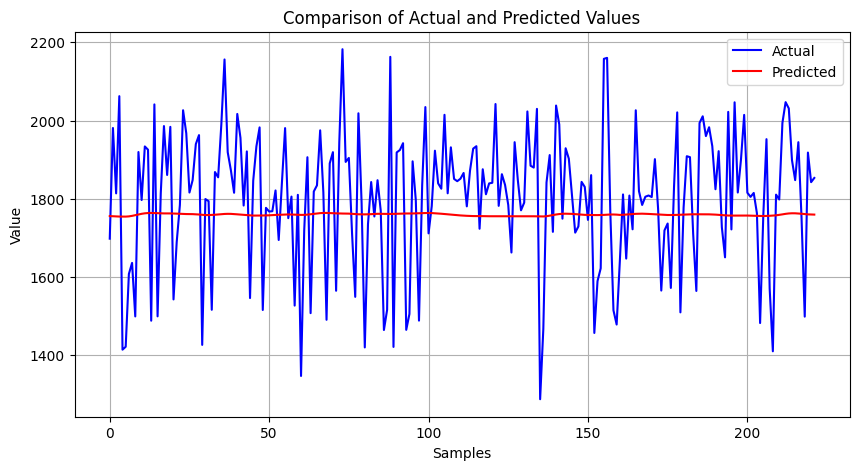

In [ ]:
import matplotlib.pyplot as plt

# Plotting the real vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(real_y, label='Actual', color='blue')
plt.plot(y_pred_inverse, label='Predicted', color='red')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

# Create a DataFrame with the actual and predicted values
results_df = pd.DataFrame({
    'Actual': real_y.flatten(),  # Flattening if necessary
    'Predicted': y_pred_inverse.flatten()
})


# Write the DataFrame to an Excel file
with pd.ExcelWriter('GRU_Results_DS1.xlsx') as writer:
    results_df.to_excel(writer, sheet_name='Predictions', index=False)

print("Data has been written to Excel successfully.")


Data has been written to Excel successfully.


# **LSTM**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()

# Adding the first LSTM layer with 200 units
model.add(LSTM(units=200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding a second LSTM layer with 100 units
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding the third LSTM layer with 50 units, return_sequences=True allows stacking another GRU layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding the last LSTM layer with 50 units
model.add(LSTM(units=50))  # This is the last LSTM layer, so return_sequences is not needed
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding the output layer
model.add(Dense(units=1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

# Assuming X_train and y_train are already prepared
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
30/30 [==============================] - 14s 141ms/step - loss: 0.0514
Epoch 2/50
30/30 [==============================] - 3s 117ms/step - loss: 0.0385
Epoch 3/50
30/30 [==============================] - 3s 115ms/step - loss: 0.0384
Epoch 4/50
30/30 [==============================] - 5s 159ms/step - loss: 0.0384
Epoch 5/50
30/30 [==============================] - 3s 116ms/step - loss: 0.0379
Epoch 6/50
30/30 [==============================] - 4s 118ms/step - loss: 0.0371
Epoch 7/50
30/30 [==============================] - 5s 161ms/step - loss: 0.0369
Epoch 8/50
30/30 [==============================] - 3s 116ms/step - loss: 0.0367
Epoch 9/50
30/30 [==============================] - 3s 115ms/step - loss: 0.0374
Epoch 10/50
30/30 [==============================] - 4s 129ms/step - loss: 0.0375
Epoch 11/50
30/30 [==============================] - 4s 143ms/step - loss: 0.0375
Epoch 12/50
30/30 [==============================] - 4s 117ms/step - loss: 0.0366
Epoch 13/50
30/30 [=====

In [ ]:
test_features_scaled = sc.transform(test_df)

# Prepare sequences for testing
X_test = []
for i in range(lag, len(test_features_scaled)):
    X_test.append(test_features_scaled[i-lag:i])  # Use all features

X_test = np.array(X_test)


# Make predictions
y_pred = model.predict(X_test)



7/7 [==============================] - 2s 36ms/step


In [ ]:

pred_full = np.zeros((y_pred.shape[0], 31))  # 31 for the number of features you have

# Assuming Y is the first column, fill in your predictions there
pred_full[:, 0] = y_pred.ravel()  # Use ravel() to ensure it's a 1D array

# Perform the inverse transformation
pred_full_inverse = sc.inverse_transform(pred_full)

# Extract the Y predictions after inverse transforming
y_pred_inverse = pred_full_inverse[:, 0]

In [ ]:
# Assuming dataset_test is your test DataFrame and it's already preprocessed to drop NaNs as before
real_y = test_df['Y'].values[-len(y_pred):]  # Make sure to align the lengths

# Ensure it is properly shaped for comparison
# If necessary, reshape it (though it should already be a 1D array matching y_pred_inverse in length)
real_y = real_y.reshape(-1, 1)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(real_y, y_pred_inverse))

# Calculate MAE
mae = mean_absolute_error(real_y, y_pred_inverse)

# Calculate MAD
mad = np.mean(np.abs(real_y - y_pred_inverse))

# Calculate MAPE - Note: You have to ensure it does not contain zeros to avoid division by zero
mape = np.mean(np.abs((real_y - y_pred_inverse) / real_y)) * 100

# Calculate R-squared
r2 = r2_score(real_y, y_pred_inverse)

# Print the results
print('RMSE: {:.4f}'.format(rmse))
print('MAE: {:.4f}'.format(mae))
print('MAD: {:.4f}'.format(mad))
print('MAPE: {:.4f}%'.format(mape))
print('R-squared: {:.4f}'.format(r2))

RMSE: 177.1954
MAE: 132.6406
MAD: 132.6741
MAPE: 7.8346%
R-squared: -0.0201


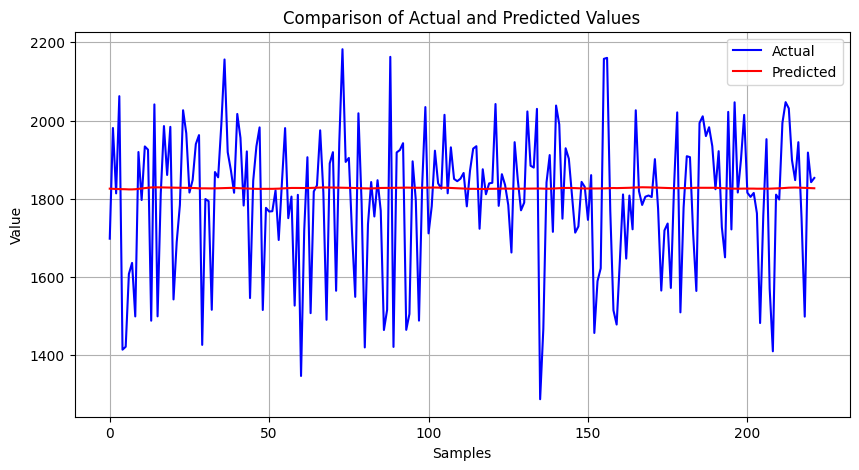

In [ ]:
import matplotlib.pyplot as plt

# Plotting the real vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(real_y, label='Actual', color='blue')
plt.plot(y_pred_inverse, label='Predicted', color='red')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


# Random search

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

def create_model(lstm_units1=200, lstm_units2=100, lstm_units3=50, lstm_units4=50, dropout_rate=0.1):
    model = Sequential([
        LSTM(units=lstm_units1, return_sequences=True, input_shape=(24, 31)),  # Adjusted input_shape to match X_train
        Dropout(rate=dropout_rate),
        LSTM(units=lstm_units2, return_sequences=True),
        Dropout(rate=dropout_rate),
        LSTM(units=lstm_units3, return_sequences=True),
        Dropout(rate=dropout_rate),
        LSTM(units=lstm_units4),  # This last LSTM layer does not return sequences
        Dropout(rate=dropout_rate),
        Dense(units=1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Wrap the model using Scikeras for compatibility with sklearn's RandomizedSearchCV
from scikeras.wrappers import KerasRegressor

model = KerasRegressor(model=create_model, epochs=5, batch_size=32, verbose=0)

from sklearn.model_selection import RandomizedSearchCV

# Parameter grid for Randomized Search
param_dist = {
    'model__lstm_units1': [100, 200],
    'model__lstm_units2': [50, 100],
    'model__lstm_units3': [25, 50, 75],
    'model__lstm_units4': [25, 50],
    'model__dropout_rate': [0.1, 0.2]
}

# Setup for Randomized Search
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42,
    scoring='neg_mean_squared_error'
)

# Execute random search
random_search.fit(X_train, y_train)

# Display the best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best score (neg_mean_squared_error):", random_search.best_score_)



Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=50, model__lstm_units4=50; total time=  25.6s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=50, model__lstm_units4=50; total time=  15.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=50, model__lstm_units4=50; total time=  15.7s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=200, model__lstm_units2=50, model__lstm_units3=75, model__lstm_units4=25; total time=  23.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=200, model__lstm_units2=50, model__lstm_units3=75, model__lstm_units4=25; total time=  24.2s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=200, model__lstm_units2=50, model__lstm_units3=75, model__lstm_units4=25; total time=  22.7s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=50, model__lstm_units4=25; total time=  17.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=50, model__lstm_units4=25; total time=  16.6s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=50, model__lstm_units4=25; total time=  13.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=200, model__lstm_units2=100, model__lstm_units3=25, model__lstm_units4=50; total time=  24.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=200, model__lstm_units2=100, model__lstm_units3=25, model__lstm_units4=50; total time=  23.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=200, model__lstm_units2=100, model__lstm_units3=25, model__lstm_units4=50; total time=  27.6s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=25, model__lstm_units4=25; total time=  15.9s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=25, model__lstm_units4=25; total time=  15.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=25, model__lstm_units4=25; total time=  15.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=200, model__lstm_units2=50, model__lstm_units3=25, model__lstm_units4=50; total time=  20.9s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=200, model__lstm_units2=50, model__lstm_units3=25, model__lstm_units4=50; total time=  24.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=200, model__lstm_units2=50, model__lstm_units3=25, model__lstm_units4=50; total time=  20.6s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.1, model__lstm_units1=200, model__lstm_units2=50, model__lstm_units3=25, model__lstm_units4=25; total time=  22.7s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.1, model__lstm_units1=200, model__lstm_units2=50, model__lstm_units3=25, model__lstm_units4=25; total time=  22.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.1, model__lstm_units1=200, model__lstm_units2=50, model__lstm_units3=25, model__lstm_units4=25; total time=  18.7s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.1, model__lstm_units1=200, model__lstm_units2=100, model__lstm_units3=25, model__lstm_units4=50; total time=  30.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.1, model__lstm_units1=200, model__lstm_units2=100, model__lstm_units3=25, model__lstm_units4=50; total time=  24.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.1, model__lstm_units1=200, model__lstm_units2=100, model__lstm_units3=25, model__lstm_units4=50; total time=  19.3s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.1, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=75, model__lstm_units4=25; total time=  14.6s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.1, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=75, model__lstm_units4=25; total time=  15.2s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.1, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=75, model__lstm_units4=25; total time=  13.7s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=25, model__lstm_units4=50; total time=  15.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=25, model__lstm_units4=50; total time=  20.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=25, model__lstm_units4=50; total time=  13.8s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Best parameters found:  {'model__lstm_units4': 25, 'model__lstm_units3': 25, 'model__lstm_units2': 50, 'model__lstm_units1': 100, 'model__dropout_rate': 0.2}
Best score (neg_mean_squared_error): -0.0353230834118301


Best LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

def build_optimized_model():
    model = Sequential([
        LSTM(units=100, return_sequences=True, input_shape=(24, 31)),  # First LSTM layer with 100 units
        Dropout(rate=0.2),  # Dropout for regularization
        LSTM(units=50, return_sequences=True),  # Second LSTM layer with 50 units
        Dropout(rate=0.2),  # Dropout for regularization
        LSTM(units=25, return_sequences=True),  # Third LSTM layer with 25 units
        Dropout(rate=0.2),  # Dropout for regularization
        LSTM(units=25),  # Fourth LSTM layer with 25 units
        Dropout(rate=0.2),  # Dropout for regularization
        Dense(units=1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the optimized model
model = build_optimized_model()

# Model summary
print(model.summary())


model.fit(X_train, y_train, epochs=50, batch_size=32)




Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 24, 100)           52800     
                                                                 
 dropout_35 (Dropout)        (None, 24, 100)           0         
                                                                 
 lstm_13 (LSTM)              (None, 24, 50)            30200     
                                                                 
 dropout_36 (Dropout)        (None, 24, 50)            0         
                                                                 
 lstm_14 (LSTM)              (None, 24, 25)            7600      
                                                                 
 dropout_37 (Dropout)        (None, 24, 25)            0         
                                                                 
 lstm_15 (LSTM)              (None, 25)               

In [ ]:
test_features_scaled = sc.transform(test_df)

# Prepare sequences for testing
X_test = []
for i in range(lag, len(test_features_scaled)):
    X_test.append(test_features_scaled[i-lag:i])  # Use all features

X_test = np.array(X_test)


# Make predictions
y_pred = model.predict(X_test)




pred_full = np.zeros((y_pred.shape[0], 31))  # 31 for the number of features you have

# Assuming Y is the first column, fill in your predictions there
pred_full[:, 0] = y_pred.ravel()  # Use ravel() to ensure it's a 1D array

# Perform the inverse transformation
pred_full_inverse = sc.inverse_transform(pred_full)

# Extract the Y predictions after inverse transforming
y_pred_inverse = pred_full_inverse[:, 0]


# Assuming dataset_test is your test DataFrame and it's already preprocessed to drop NaNs as before
real_y = test_df['Y'].values[-len(y_pred):]  # Make sure to align the lengths

# Ensure it is properly shaped for comparison
# If necessary, reshape it (though it should already be a 1D array matching y_pred_inverse in length)
real_y = real_y.reshape(-1, 1)

7/7 [==============================] - 2s 17ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(real_y, y_pred_inverse))

# Calculate MAE
mae = mean_absolute_error(real_y, y_pred_inverse)

# Calculate MAD
mad = np.mean(np.abs(real_y - y_pred_inverse))

# Calculate MAPE - Note: You have to ensure it does not contain zeros to avoid division by zero
mape = np.mean(np.abs((real_y - y_pred_inverse) / real_y)) * 100

# Calculate R-squared
r2 = r2_score(real_y, y_pred_inverse)

# Print the results
print('RMSE: {:.4f}'.format(rmse))
print('MAE: {:.4f}'.format(mae))
print('MAD: {:.4f}'.format(mad))
print('MAPE: {:.4f}%'.format(mape))
print('R-squared: {:.4f}'.format(r2))

RMSE: 175.8208
MAE: 137.1029
MAD: 137.1759
MAPE: 7.9199%
R-squared: -0.0044


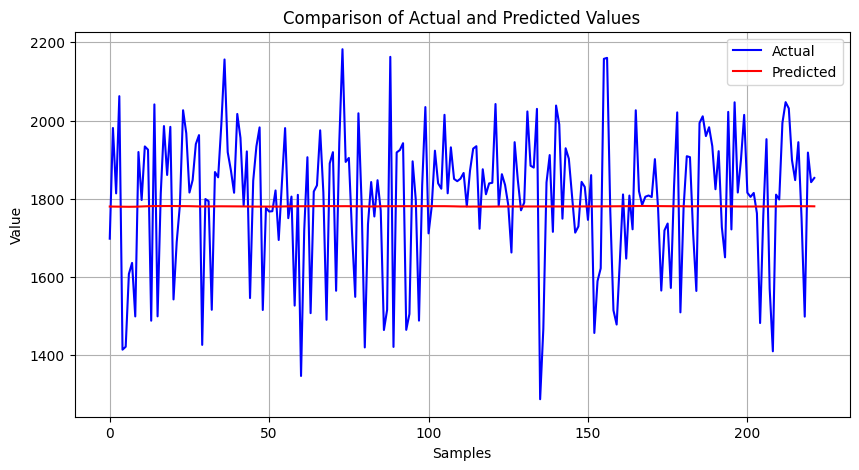

In [ ]:
import matplotlib.pyplot as plt

# Plotting the real vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(real_y, label='Actual', color='blue')
plt.plot(y_pred_inverse, label='Predicted', color='red')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

import pandas as pd

# Create a DataFrame with the actual and predicted values
results_df = pd.DataFrame({
    'Actual': real_y.flatten(),  # Flattening if necessary
    'Predicted': y_pred_inverse.flatten()
})


# Write the DataFrame to an Excel file
with pd.ExcelWriter('LSTM_Results_DS1.xlsx') as writer:
    results_df.to_excel(writer, sheet_name='Predictions', index=False)

print("Data has been written to Excel successfully.")


Data has been written to Excel successfully.


# **BILSTM**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Bidirectional

model = Sequential()

# Adding the first BiLSTM layer with 200 units
model.add(Bidirectional(LSTM(units=200, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding a second BiLSTM layer with 100 units
model.add(Bidirectional(LSTM(units=100, return_sequences=True)))
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding the third BiLSTM layer with 50 units, return_sequences=True allows stacking another BiLSTM layer
model.add(Bidirectional(LSTM(units=50, return_sequences=True)))
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding the last BiLSTM layer with 50 units
model.add(Bidirectional(LSTM(units=50)))  # This is the last BiLSTM layer, so return_sequences is not needed
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding the output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model architecture
print(model.summary())
model.fit(X_train, y_train, epochs=50, batch_size=32)


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_12 (Bidirect  (None, 24, 400)           371200    
 ional)                                                          
                                                                 
 dropout_39 (Dropout)        (None, 24, 400)           0         
                                                                 
 bidirectional_13 (Bidirect  (None, 24, 200)           400800    
 ional)                                                          
                                                                 
 dropout_40 (Dropout)        (None, 24, 200)           0         
                                                                 
 bidirectional_14 (Bidirect  (None, 24, 100)           100400    
 ional)                                                          
                                                     

In [ ]:
test_features_scaled = sc.transform(test_df)

# Prepare sequences for testing
X_test = []
for i in range(lag, len(test_features_scaled)):
    X_test.append(test_features_scaled[i-lag:i])  # Use all features

X_test = np.array(X_test)


# Make predictions
y_pred = model.predict(X_test)




pred_full = np.zeros((y_pred.shape[0], 31))  # 31 for the number of features you have

# Assuming Y is the first column, fill in your predictions there
pred_full[:, 0] = y_pred.ravel()  # Use ravel() to ensure it's a 1D array

# Perform the inverse transformation
pred_full_inverse = sc.inverse_transform(pred_full)

# Extract the Y predictions after inverse transforming
y_pred_inverse = pred_full_inverse[:, 0]


# Assuming dataset_test is your test DataFrame and it's already preprocessed to drop NaNs as before
real_y = test_df['Y'].values[-len(y_pred):]  # Make sure to align the lengths

# Ensure it is properly shaped for comparison
# If necessary, reshape it (though it should already be a 1D array matching y_pred_inverse in length)
real_y = real_y.reshape(-1, 1)


7/7 [==============================] - 6s 131ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(real_y, y_pred_inverse))

# Calculate MAE
mae = mean_absolute_error(real_y, y_pred_inverse)

# Calculate MAD
mad = np.mean(np.abs(real_y - y_pred_inverse))

# Calculate MAPE - Note: You have to ensure it does not contain zeros to avoid division by zero
mape = np.mean(np.abs((real_y - y_pred_inverse) / real_y)) * 100

# Calculate R-squared
r2 = r2_score(real_y, y_pred_inverse)

# Print the results
print('RMSE: {:.4f}'.format(rmse))
print('MAE: {:.4f}'.format(mae))
print('MAD: {:.4f}'.format(mad))
print('MAPE: {:.4f}%'.format(mape))
print('R-squared: {:.4f}'.format(r2))

RMSE: 174.9004
MAE: 134.6409
MAD: 135.8658
MAPE: 7.8817%
R-squared: 0.0061


Random search

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Bidirectional
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV

def create_model(bilstm_units1=200, bilstm_units2=100, bilstm_units3=50, bilstm_units4=50, dropout_rate=0.1):
    model = Sequential([
        Bidirectional(LSTM(units=bilstm_units1, return_sequences=True), input_shape=(24, 31)),
        Dropout(rate=dropout_rate),
        Bidirectional(LSTM(units=bilstm_units2, return_sequences=True)),
        Dropout(rate=dropout_rate),
        Bidirectional(LSTM(units=bilstm_units3, return_sequences=True)),
        Dropout(rate=dropout_rate),
        Bidirectional(LSTM(units=bilstm_units4)),  # This last LSTM layer does not return sequences
        Dropout(rate=dropout_rate),
        Dense(units=1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Wrap the model using Scikeras for compatibility with sklearn's RandomizedSearchCV
model = KerasRegressor(model=create_model, epochs=5, batch_size=32, verbose=0)

# Parameter grid for Randomized Search
param_dist = {
    'model__bilstm_units1': [100, 200],
    'model__bilstm_units2': [50, 100],
    'model__bilstm_units3': [25, 50, 75],
    'model__bilstm_units4': [25, 50],
    'model__dropout_rate': [0.1, 0.2]
}

# Setup for Randomized Search
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42,
    scoring='neg_mean_squared_error'
)

# Execute random search
random_search.fit(X_train, y_train)

# Display the best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best score (neg_mean_squared_error):", random_search.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=50, model__bilstm_units3=25, model__bilstm_units4=50, model__dropout_rate=0.2; total time= 1.2min


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=50, model__bilstm_units3=25, model__bilstm_units4=50, model__dropout_rate=0.2; total time=  59.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=50, model__bilstm_units3=25, model__bilstm_units4=50, model__dropout_rate=0.2; total time=  41.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=100, model__bilstm_units3=50, model__bilstm_units4=25, model__dropout_rate=0.1; total time=  49.3s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=100, model__bilstm_units3=50, model__bilstm_units4=25, model__dropout_rate=0.1; total time=  50.2s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=100, model__bilstm_units3=50, model__bilstm_units4=25, model__dropout_rate=0.1; total time= 1.1min


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=50, model__bilstm_units3=25, model__bilstm_units4=50, model__dropout_rate=0.1; total time=  54.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=50, model__bilstm_units3=25, model__bilstm_units4=50, model__dropout_rate=0.1; total time=  54.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=50, model__bilstm_units3=25, model__bilstm_units4=50, model__dropout_rate=0.1; total time=  42.8s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=100, model__bilstm_units3=50, model__bilstm_units4=50, model__dropout_rate=0.2; total time=  55.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=100, model__bilstm_units3=50, model__bilstm_units4=50, model__dropout_rate=0.2; total time= 1.0min


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=100, model__bilstm_units3=50, model__bilstm_units4=50, model__dropout_rate=0.2; total time=  49.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=50, model__bilstm_units3=25, model__bilstm_units4=25, model__dropout_rate=0.1; total time=  58.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=50, model__bilstm_units3=25, model__bilstm_units4=25, model__dropout_rate=0.1; total time=  53.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=50, model__bilstm_units3=25, model__bilstm_units4=25, model__dropout_rate=0.1; total time=  42.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=100, model__bilstm_units3=25, model__bilstm_units4=25, model__dropout_rate=0.2; total time=  49.4s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=100, model__bilstm_units3=25, model__bilstm_units4=25, model__dropout_rate=0.2; total time=  50.2s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=100, model__bilstm_units3=25, model__bilstm_units4=25, model__dropout_rate=0.2; total time=  53.2s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=100, model__bilstm_units2=100, model__bilstm_units3=25, model__bilstm_units4=25, model__dropout_rate=0.1; total time=  43.4s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=100, model__bilstm_units2=100, model__bilstm_units3=25, model__bilstm_units4=25, model__dropout_rate=0.1; total time=  43.2s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=100, model__bilstm_units2=100, model__bilstm_units3=25, model__bilstm_units4=25, model__dropout_rate=0.1; total time=  50.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=100, model__bilstm_units2=100, model__bilstm_units3=50, model__bilstm_units4=50, model__dropout_rate=0.2; total time=  41.4s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=100, model__bilstm_units2=100, model__bilstm_units3=50, model__bilstm_units4=50, model__dropout_rate=0.2; total time=  40.6s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=100, model__bilstm_units2=100, model__bilstm_units3=50, model__bilstm_units4=50, model__dropout_rate=0.2; total time=  39.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=100, model__bilstm_units2=50, model__bilstm_units3=50, model__bilstm_units4=25, model__dropout_rate=0.1; total time=  33.9s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=100, model__bilstm_units2=50, model__bilstm_units3=50, model__bilstm_units4=25, model__dropout_rate=0.1; total time=  33.3s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=100, model__bilstm_units2=50, model__bilstm_units3=50, model__bilstm_units4=25, model__dropout_rate=0.1; total time=  31.8s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=50, model__bilstm_units3=25, model__bilstm_units4=25, model__dropout_rate=0.2; total time=  52.2s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=50, model__bilstm_units3=25, model__bilstm_units4=25, model__dropout_rate=0.2; total time=  49.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=50, model__bilstm_units3=25, model__bilstm_units4=25, model__dropout_rate=0.2; total time=  54.4s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Best parameters found:  {'model__dropout_rate': 0.2, 'model__bilstm_units4': 25, 'model__bilstm_units3': 25, 'model__bilstm_units2': 100, 'model__bilstm_units1': 200}
Best score (neg_mean_squared_error): -0.03516169597346608


Best BILSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

# Setting up the model with the best parameters
model = Sequential([
    Bidirectional(LSTM(units=200, return_sequences=True), input_shape=(24, 31)),  # First BiLSTM layer
    Dropout(rate=0.2),  # Dropout for the first layer
    Bidirectional(LSTM(units=100, return_sequences=True)),  # Second BiLSTM layer
    Dropout(rate=0.2),  # Dropout for the second layer
    Bidirectional(LSTM(units=25, return_sequences=True)),  # Third BiLSTM layer
    Dropout(rate=0.2),  # Dropout for the third layer
    Bidirectional(LSTM(units=25)),  # Fourth and last BiLSTM layer
    Dropout(rate=0.2),  # Dropout for the last layer
    Dense(units=1)  # Output layer
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model architecture
print(model.summary())
model.fit(X_train, y_train, epochs=50, batch_size=32)


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_16 (Bidirect  (None, 24, 400)           371200    
 ional)                                                          
                                                                 
 dropout_43 (Dropout)        (None, 24, 400)           0         
                                                                 
 bidirectional_17 (Bidirect  (None, 24, 200)           400800    
 ional)                                                          
                                                                 
 dropout_44 (Dropout)        (None, 24, 200)           0         
                                                                 
 bidirectional_18 (Bidirect  (None, 24, 50)            45200     
 ional)                                                          
                                                     

In [ ]:
test_features_scaled = sc.transform(test_df)

# Prepare sequences for testing
X_test = []
for i in range(lag, len(test_features_scaled)):
    X_test.append(test_features_scaled[i-lag:i])  # Use all features

X_test = np.array(X_test)


# Make predictions
y_pred = model.predict(X_test)




pred_full = np.zeros((y_pred.shape[0], 31))  # 31 for the number of features you have

# Assuming Y is the first column, fill in your predictions there
pred_full[:, 0] = y_pred.ravel()  # Use ravel() to ensure it's a 1D array

# Perform the inverse transformation
pred_full_inverse = sc.inverse_transform(pred_full)

# Extract the Y predictions after inverse transforming
y_pred_inverse = pred_full_inverse[:, 0]


# Assuming dataset_test is your test DataFrame and it's already preprocessed to drop NaNs as before
real_y = test_df['Y'].values[-len(y_pred):]  # Make sure to align the lengths

# Ensure it is properly shaped for comparison
# If necessary, reshape it (though it should already be a 1D array matching y_pred_inverse in length)
real_y = real_y.reshape(-1, 1)

7/7 [==============================] - 4s 66ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(real_y, y_pred_inverse))

# Calculate MAE
mae = mean_absolute_error(real_y, y_pred_inverse)

# Calculate MAD
mad = np.mean(np.abs(real_y - y_pred_inverse))

# Calculate MAPE - Note: You have to ensure it does not contain zeros to avoid division by zero
mape = np.mean(np.abs((real_y - y_pred_inverse) / real_y)) * 100

# Calculate R-squared
r2 = r2_score(real_y, y_pred_inverse)

# Print the results
print('RMSE: {:.4f}'.format(rmse))
print('MAE: {:.4f}'.format(mae))
print('MAD: {:.4f}'.format(mad))
print('MAPE: {:.4f}%'.format(mape))
print('R-squared: {:.4f}'.format(r2))

RMSE: 177.0354
MAE: 140.7127
MAD: 141.1659
MAPE: 8.0825%
R-squared: -0.0183


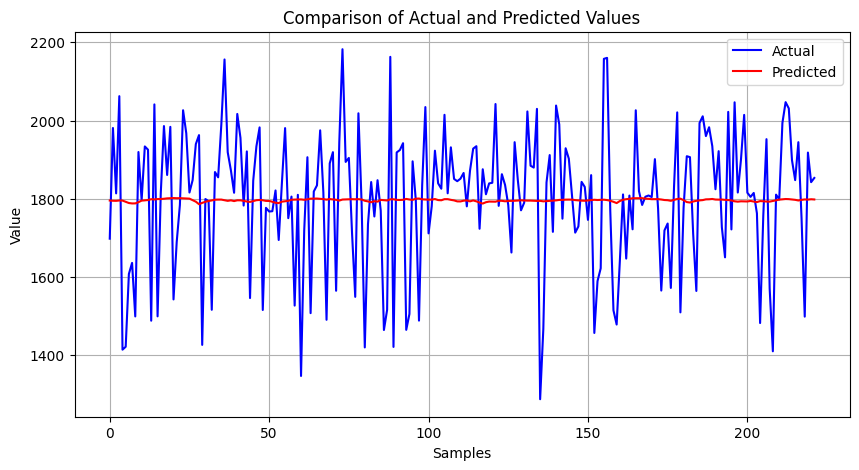

In [ ]:
import matplotlib.pyplot as plt

# Plotting the real vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(real_y, label='Actual', color='blue')
plt.plot(y_pred_inverse, label='Predicted', color='red')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

# Create a DataFrame with the actual and predicted values
results_df = pd.DataFrame({
    'Actual': real_y.flatten(),  # Flattening if necessary
    'Predicted': y_pred_inverse.flatten()
})


# Write the DataFrame to an Excel file
with pd.ExcelWriter('BILSTM_Results_DS1.xlsx') as writer:
    results_df.to_excel(writer, sheet_name='Predictions', index=False)

print("Data has been written to Excel successfully.")


Data has been written to Excel successfully.


# **BIGRU**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense, Bidirectional

model = Sequential()

# Adding the first BiGRU layer with 200 units
model.add(Bidirectional(GRU(units=200, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding a second BiGRU layer with 100 units
model.add(Bidirectional(GRU(units=100, return_sequences=True)))
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding the third BiGRU layer with 50 units, return_sequences=True allows stacking another BiGRU layer
model.add(Bidirectional(GRU(units=50, return_sequences=True)))
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding the last BiGRU layer with 50 units
model.add(Bidirectional(GRU(units=50)))  # This is the last BiGRU layer, so return_sequences is not needed
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding the output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model architecture
print(model.summary())

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_20 (Bidirect  (None, 24, 400)           279600    
 ional)                                                          
                                                                 
 dropout_47 (Dropout)        (None, 24, 400)           0         
                                                                 
 bidirectional_21 (Bidirect  (None, 24, 200)           301200    
 ional)                                                          
                                                                 
 dropout_48 (Dropout)        (None, 24, 200)           0         
                                                                 
 bidirectional_22 (Bidirect  (None, 24, 100)           75600     
 ional)                                                          
                                                     

In [ ]:
test_features_scaled = sc.transform(test_df)

# Prepare sequences for testing
X_test = []
for i in range(lag, len(test_features_scaled)):
    X_test.append(test_features_scaled[i-lag:i])  # Use all features

X_test = np.array(X_test)


# Make predictions
y_pred = model.predict(X_test)




pred_full = np.zeros((y_pred.shape[0], 31))  # 31 for the number of features you have

# Assuming Y is the first column, fill in your predictions there
pred_full[:, 0] = y_pred.ravel()  # Use ravel() to ensure it's a 1D array

# Perform the inverse transformation
pred_full_inverse = sc.inverse_transform(pred_full)

# Extract the Y predictions after inverse transforming
y_pred_inverse = pred_full_inverse[:, 0]


# Assuming dataset_test is your test DataFrame and it's already preprocessed to drop NaNs as before
real_y = test_df['Y'].values[-len(y_pred):]  # Make sure to align the lengths

# Ensure it is properly shaped for comparison
# If necessary, reshape it (though it should already be a 1D array matching y_pred_inverse in length)
real_y = real_y.reshape(-1, 1)


7/7 [==============================] - 4s 62ms/step


In [ ]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(real_y, y_pred_inverse))

# Calculate MAE
mae = mean_absolute_error(real_y, y_pred_inverse)

# Calculate MAD
mad = np.mean(np.abs(real_y - y_pred_inverse))

# Calculate MAPE - Note: You have to ensure it does not contain zeros to avoid division by zero
mape = np.mean(np.abs((real_y - y_pred_inverse) / real_y)) * 100

# Calculate R-squared
r2 = r2_score(real_y, y_pred_inverse)

# Print the results
print('RMSE: {:.4f}'.format(rmse))
print('MAE: {:.4f}'.format(mae))
print('MAD: {:.4f}'.format(mad))
print('MAPE: {:.4f}%'.format(mape))
print('R-squared: {:.4f}'.format(r2))

RMSE: 174.5996
MAE: 135.5265
MAD: 136.5378
MAPE: 7.9072%
R-squared: 0.0095


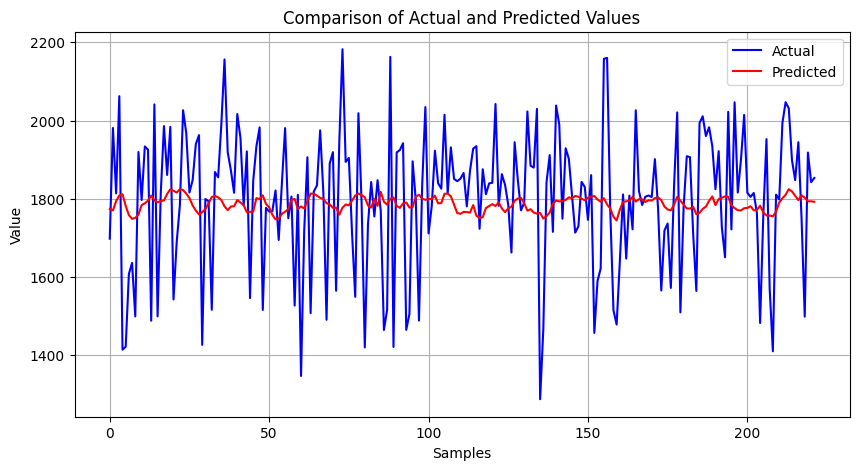

In [ ]:
import matplotlib.pyplot as plt

# Plotting the real vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(real_y, label='Actual', color='blue')
plt.plot(y_pred_inverse, label='Predicted', color='red')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

Random Search

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense, Bidirectional
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV

def create_model(bigru_units1=200, bigru_units2=100, bigru_units3=50, bigru_units4=50, dropout_rate=0.1):
    model = Sequential([
        Bidirectional(GRU(units=bigru_units1, return_sequences=True), input_shape=(24, 31)),
        Dropout(rate=dropout_rate),
        Bidirectional(GRU(units=bigru_units2, return_sequences=True)),
        Dropout(rate=dropout_rate),
        Bidirectional(GRU(units=bigru_units3, return_sequences=True)),
        Dropout(rate=dropout_rate),
        Bidirectional(GRU(units=bigru_units4)),  # This last GRU layer does not return sequences
        Dropout(rate=dropout_rate),
        Dense(units=1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Wrap the model using Scikeras for compatibility with sklearn's RandomizedSearchCV
model = KerasRegressor(model=create_model, epochs=5, batch_size=32, verbose=0)

# Parameter grid for Randomized Search
param_dist = {
    'model__bigru_units1': [100, 200],
    'model__bigru_units2': [50, 100],
    'model__bigru_units3': [25, 50, 75],
    'model__bigru_units4': [25, 50],
    'model__dropout_rate': [0.1, 0.2]
}

# Setup for Randomized Search
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42,
    scoring='neg_mean_squared_error'
)

# Execute random search
random_search.fit(X_train, y_train)

# Display the best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best score (neg_mean_squared_error):", random_search.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=50, model__bigru_units3=25, model__bigru_units4=50, model__dropout_rate=0.2; total time= 1.3min


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=50, model__bigru_units3=25, model__bigru_units4=50, model__dropout_rate=0.2; total time=  58.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=50, model__bigru_units3=25, model__bigru_units4=50, model__dropout_rate=0.2; total time=  49.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=100, model__bigru_units3=50, model__bigru_units4=25, model__dropout_rate=0.1; total time= 1.2min


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=100, model__bigru_units3=50, model__bigru_units4=25, model__dropout_rate=0.1; total time=  58.7s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=100, model__bigru_units3=50, model__bigru_units4=25, model__dropout_rate=0.1; total time=  49.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=50, model__bigru_units3=25, model__bigru_units4=50, model__dropout_rate=0.1; total time=  46.2s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=50, model__bigru_units3=25, model__bigru_units4=50, model__dropout_rate=0.1; total time= 1.2min


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=50, model__bigru_units3=25, model__bigru_units4=50, model__dropout_rate=0.1; total time=  49.8s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=100, model__bigru_units3=50, model__bigru_units4=50, model__dropout_rate=0.2; total time= 1.1min


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=100, model__bigru_units3=50, model__bigru_units4=50, model__dropout_rate=0.2; total time= 1.1min


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=100, model__bigru_units3=50, model__bigru_units4=50, model__dropout_rate=0.2; total time=  56.4s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=50, model__bigru_units3=25, model__bigru_units4=25, model__dropout_rate=0.1; total time= 1.1min


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=50, model__bigru_units3=25, model__bigru_units4=25, model__dropout_rate=0.1; total time=  56.3s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=50, model__bigru_units3=25, model__bigru_units4=25, model__dropout_rate=0.1; total time=  54.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=100, model__bigru_units3=25, model__bigru_units4=25, model__dropout_rate=0.2; total time= 1.2min


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=100, model__bigru_units3=25, model__bigru_units4=25, model__dropout_rate=0.2; total time= 1.3min


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=100, model__bigru_units3=25, model__bigru_units4=25, model__dropout_rate=0.2; total time= 1.0min


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=100, model__bigru_units2=100, model__bigru_units3=25, model__bigru_units4=25, model__dropout_rate=0.1; total time=  47.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=100, model__bigru_units2=100, model__bigru_units3=25, model__bigru_units4=25, model__dropout_rate=0.1; total time= 1.0min


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=100, model__bigru_units2=100, model__bigru_units3=25, model__bigru_units4=25, model__dropout_rate=0.1; total time=  45.6s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=100, model__bigru_units2=100, model__bigru_units3=50, model__bigru_units4=50, model__dropout_rate=0.2; total time=  47.6s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=100, model__bigru_units2=100, model__bigru_units3=50, model__bigru_units4=50, model__dropout_rate=0.2; total time=  50.7s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=100, model__bigru_units2=100, model__bigru_units3=50, model__bigru_units4=50, model__dropout_rate=0.2; total time=  44.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=100, model__bigru_units2=50, model__bigru_units3=50, model__bigru_units4=25, model__dropout_rate=0.1; total time=  50.4s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=100, model__bigru_units2=50, model__bigru_units3=50, model__bigru_units4=25, model__dropout_rate=0.1; total time=  50.4s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=100, model__bigru_units2=50, model__bigru_units3=50, model__bigru_units4=25, model__dropout_rate=0.1; total time=  40.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=50, model__bigru_units3=25, model__bigru_units4=25, model__dropout_rate=0.2; total time= 1.2min


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=50, model__bigru_units3=25, model__bigru_units4=25, model__dropout_rate=0.2; total time= 1.2min


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=50, model__bigru_units3=25, model__bigru_units4=25, model__dropout_rate=0.2; total time= 1.1min


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Best parameters found:  {'model__dropout_rate': 0.2, 'model__bigru_units4': 50, 'model__bigru_units3': 50, 'model__bigru_units2': 100, 'model__bigru_units1': 100}
Best score (neg_mean_squared_error): -0.036148380116883844


Best BIGRU

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense, Bidirectional

# Create the model with the optimized parameters
model = Sequential([
    Bidirectional(GRU(units=100, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(rate=0.2),
    Bidirectional(GRU(units=100, return_sequences=True)),
    Dropout(rate=0.2),
    Bidirectional(GRU(units=50, return_sequences=True)),
    Dropout(rate=0.2),
    Bidirectional(GRU(units=50)),
    Dropout(rate=0.2),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model architecture
print(model.summary())

# Fit the model (uncomment the line below to train the model with your training data)
model.fit(X_train, y_train, epochs=50, batch_size=32)


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_24 (Bidirect  (None, 24, 200)           79800     
 ional)                                                          
                                                                 
 dropout_51 (Dropout)        (None, 24, 200)           0         
                                                                 
 bidirectional_25 (Bidirect  (None, 24, 200)           181200    
 ional)                                                          
                                                                 
 dropout_52 (Dropout)        (None, 24, 200)           0         
                                                                 
 bidirectional_26 (Bidirect  (None, 24, 100)           75600     
 ional)                                                          
                                                     

In [ ]:
test_features_scaled = sc.transform(test_df)

# Prepare sequences for testing
X_test = []
for i in range(lag, len(test_features_scaled)):
    X_test.append(test_features_scaled[i-lag:i])  # Use all features

X_test = np.array(X_test)


# Make predictions
y_pred = model.predict(X_test)




pred_full = np.zeros((y_pred.shape[0], 31))  # 31 for the number of features you have

# Assuming Y is the first column, fill in your predictions there
pred_full[:, 0] = y_pred.ravel()  # Use ravel() to ensure it's a 1D array

# Perform the inverse transformation
pred_full_inverse = sc.inverse_transform(pred_full)

# Extract the Y predictions after inverse transforming
y_pred_inverse = pred_full_inverse[:, 0]


# Assuming dataset_test is your test DataFrame and it's already preprocessed to drop NaNs as before
real_y = test_df['Y'].values[-len(y_pred):]  # Make sure to align the lengths

# Ensure it is properly shaped for comparison
# If necessary, reshape it (though it should already be a 1D array matching y_pred_inverse in length)
real_y = real_y.reshape(-1, 1)

7/7 [==============================] - 3s 38ms/step


In [ ]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(real_y, y_pred_inverse))

# Calculate MAE
mae = mean_absolute_error(real_y, y_pred_inverse)

# Calculate MAD
mad = np.mean(np.abs(real_y - y_pred_inverse))

# Calculate MAPE - Note: You have to ensure it does not contain zeros to avoid division by zero
mape = np.mean(np.abs((real_y - y_pred_inverse) / real_y)) * 100

# Calculate R-squared
r2 = r2_score(real_y, y_pred_inverse)

# Print the results
print('RMSE: {:.4f}'.format(rmse))
print('MAE: {:.4f}'.format(mae))
print('MAD: {:.4f}'.format(mad))
print('MAPE: {:.4f}%'.format(mape))
print('R-squared: {:.4f}'.format(r2))

RMSE: 178.1892
MAE: 144.0167
MAD: 144.5541
MAPE: 8.2326%
R-squared: -0.0316


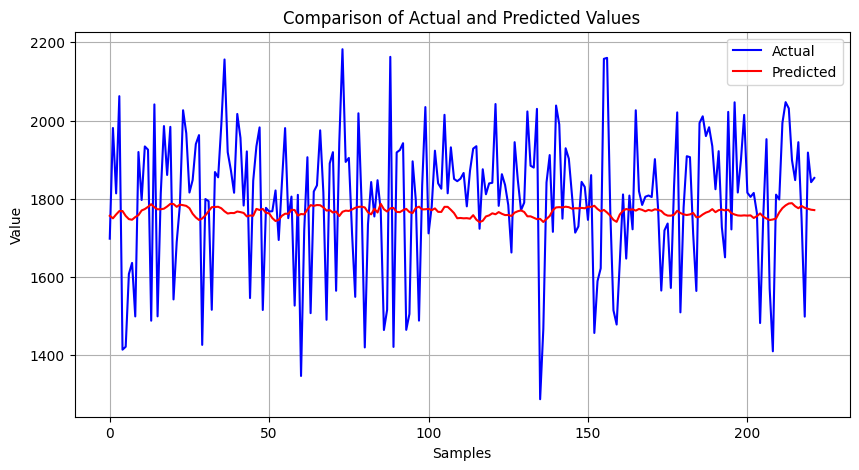

In [ ]:

import matplotlib.pyplot as plt

# Plotting the real vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(real_y, label='Actual', color='blue')
plt.plot(y_pred_inverse, label='Predicted', color='red')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Create a DataFrame with the actual and predicted values
results_df = pd.DataFrame({
    'Actual': real_y.flatten(),  # Flattening if necessary
    'Predicted': y_pred_inverse.flatten()
})


# Write the DataFrame to an Excel file
with pd.ExcelWriter('BIGRU_Results_DS1.xlsx') as writer:
    results_df.to_excel(writer, sheet_name='Predictions', index=False)

print("Data has been written to Excel successfully.")


Data has been written to Excel successfully.


# **CNN**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Dense, Flatten

model = Sequential()

# Adding the first convolutional layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.1))  # Applying 10% dropout

# Adding a second convolutional layer
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(Dropout(0.1))  # Applying 10% dropout

# Adding a third convolutional layer
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))  # Adding max pooling to reduce dimensionality
model.add(Dropout(0.1))  # Applying 10% dropout

# Flatten the data for the dense layers
model.add(Flatten())

# Adding a dense layer
model.add(Dense(units=100, activation='relu'))
model.add(Dropout(0.1))  # Applying 10% dropout

# Adding the output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model architecture
print(model.summary())

# Train the model (uncomment the line below to train the model with your training data)
model.fit(X_train, y_train, epochs=50, batch_size=32)


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 22, 64)            6016      
                                                                 
 dropout_55 (Dropout)        (None, 22, 64)            0         
                                                                 
 conv1d_6 (Conv1D)           (None, 20, 128)           24704     
                                                                 
 dropout_56 (Dropout)        (None, 20, 128)           0         
                                                                 
 conv1d_7 (Conv1D)           (None, 18, 128)           49280     
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 9, 128)            0         
 g1D)                                                            
                                                     

In [ ]:
test_features_scaled = sc.transform(test_df)

# Prepare sequences for testing
X_test = []
for i in range(lag, len(test_features_scaled)):
    X_test.append(test_features_scaled[i-lag:i])  # Use all features

X_test = np.array(X_test)


# Make predictions
y_pred = model.predict(X_test)




pred_full = np.zeros((y_pred.shape[0], 31))  # 31 for the number of features you have

# Assuming Y is the first column, fill in your predictions there
pred_full[:, 0] = y_pred.ravel()  # Use ravel() to ensure it's a 1D array

# Perform the inverse transformation
pred_full_inverse = sc.inverse_transform(pred_full)

# Extract the Y predictions after inverse transforming
y_pred_inverse = pred_full_inverse[:, 0]


# Assuming dataset_test is your test DataFrame and it's already preprocessed to drop NaNs as before
real_y = test_df['Y'].values[-len(y_pred):]  # Make sure to align the lengths

# Ensure it is properly shaped for comparison
# If necessary, reshape it (though it should already be a 1D array matching y_pred_inverse in length)
real_y = real_y.reshape(-1, 1)

7/7 [==============================] - 0s 6ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(real_y, y_pred_inverse))

# Calculate MAE
mae = mean_absolute_error(real_y, y_pred_inverse)

# Calculate MAD
mad = np.mean(np.abs(real_y - y_pred_inverse))

# Calculate MAPE - Note: You have to ensure it does not contain zeros to avoid division by zero
mape = np.mean(np.abs((real_y - y_pred_inverse) / real_y)) * 100

# Calculate R-squared
r2 = r2_score(real_y, y_pred_inverse)

# Print the results
print('RMSE: {:.4f}'.format(rmse))
print('MAE: {:.4f}'.format(mae))
print('MAD: {:.4f}'.format(mad))
print('MAPE: {:.4f}%'.format(mape))
print('R-squared: {:.4f}'.format(r2))

RMSE: 191.5413
MAE: 152.2045
MAD: 159.0698
MAPE: 9.1654%
R-squared: -0.1920


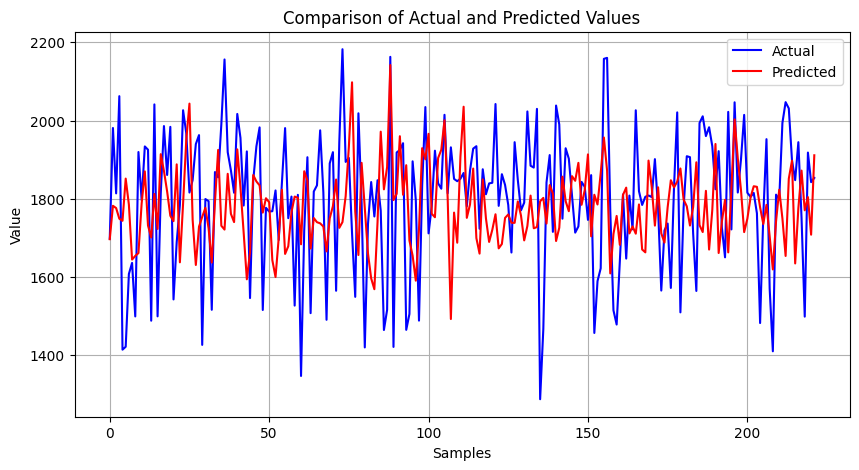

In [ ]:
import matplotlib.pyplot as plt

# Plotting the real vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(real_y, label='Actual', color='blue')
plt.plot(y_pred_inverse, label='Predicted', color='red')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

Random Search

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Dense, Flatten
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV

def create_model(filters1=64, filters2=128, kernel_size1=3, kernel_size2=3, dropout_rate=0.1):
    model = Sequential([
        Conv1D(filters=filters1, kernel_size=kernel_size1, activation='relu', input_shape=(24, 31)),
        Dropout(rate=dropout_rate),
        Conv1D(filters=filters2, kernel_size=kernel_size2, activation='relu'),
        MaxPooling1D(pool_size=2),
        Dropout(rate=dropout_rate),
        Flatten(),
        Dense(units=100, activation='relu'),
        Dropout(rate=dropout_rate),
        Dense(units=1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Wrap the model using Scikeras for compatibility with sklearn's RandomizedSearchCV
model = KerasRegressor(model=create_model, epochs=5, batch_size=32, verbose=0)

# Parameter grid for Randomized Search
param_dist = {
    'model__filters1': [32, 64, 128],
    'model__filters2': [64, 128, 256],
    'model__kernel_size1': [3, 5],
    'model__kernel_size2': [3, 5],
    'model__dropout_rate': [0.1, 0.2, 0.3]
}

# Setup for Randomized Search
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42,
    scoring='neg_mean_squared_error'
)

# Execute random search
random_search.fit(X_train, y_train)

# Display the best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best score (neg_mean_squared_error):", random_search.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.3, model__filters1=32, model__filters2=128, model__kernel_size1=3, model__kernel_size2=5; total time=   3.6s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.3, model__filters1=32, model__filters2=128, model__kernel_size1=3, model__kernel_size2=5; total time=   3.7s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.3, model__filters1=32, model__filters2=128, model__kernel_size1=3, model__kernel_size2=5; total time=   3.3s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.1, model__filters1=32, model__filters2=256, model__kernel_size1=5, model__kernel_size2=3; total time=   3.2s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.1, model__filters1=32, model__filters2=256, model__kernel_size1=5, model__kernel_size2=3; total time=   4.3s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.1, model__filters1=32, model__filters2=256, model__kernel_size1=5, model__kernel_size2=3; total time=   3.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.1, model__filters1=32, model__filters2=128, model__kernel_size1=3, model__kernel_size2=3; total time=   3.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.1, model__filters1=32, model__filters2=128, model__kernel_size1=3, model__kernel_size2=3; total time=   3.4s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.1, model__filters1=32, model__filters2=128, model__kernel_size1=3, model__kernel_size2=3; total time=   3.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.3, model__filters1=32, model__filters2=256, model__kernel_size1=5, model__kernel_size2=5; total time=   3.2s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.3, model__filters1=32, model__filters2=256, model__kernel_size1=5, model__kernel_size2=5; total time=   3.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.3, model__filters1=32, model__filters2=256, model__kernel_size1=5, model__kernel_size2=5; total time=   4.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.2, model__filters1=128, model__filters2=64, model__kernel_size1=5, model__kernel_size2=3; total time=   3.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.2, model__filters1=128, model__filters2=64, model__kernel_size1=5, model__kernel_size2=3; total time=  16.3s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.2, model__filters1=128, model__filters2=64, model__kernel_size1=5, model__kernel_size2=3; total time=   4.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.2, model__filters1=128, model__filters2=128, model__kernel_size1=5, model__kernel_size2=5; total time=   5.2s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.2, model__filters1=128, model__filters2=128, model__kernel_size1=5, model__kernel_size2=5; total time=   3.6s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.2, model__filters1=128, model__filters2=128, model__kernel_size1=5, model__kernel_size2=5; total time=   4.8s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.1, model__filters1=128, model__filters2=128, model__kernel_size1=5, model__kernel_size2=3; total time=   3.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.1, model__filters1=128, model__filters2=128, model__kernel_size1=5, model__kernel_size2=3; total time=   4.4s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.1, model__filters1=128, model__filters2=128, model__kernel_size1=5, model__kernel_size2=3; total time=   4.7s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.2, model__filters1=32, model__filters2=256, model__kernel_size1=3, model__kernel_size2=5; total time=   3.3s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.2, model__filters1=32, model__filters2=256, model__kernel_size1=3, model__kernel_size2=5; total time=   3.4s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.2, model__filters1=32, model__filters2=256, model__kernel_size1=3, model__kernel_size2=5; total time=   4.4s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.3, model__filters1=64, model__filters2=256, model__kernel_size1=5, model__kernel_size2=5; total time=   3.7s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.3, model__filters1=64, model__filters2=256, model__kernel_size1=5, model__kernel_size2=5; total time=   3.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.3, model__filters1=64, model__filters2=256, model__kernel_size1=5, model__kernel_size2=5; total time=   4.8s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.1, model__filters1=32, model__filters2=256, model__kernel_size1=5, model__kernel_size2=5; total time=   3.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.1, model__filters1=32, model__filters2=256, model__kernel_size1=5, model__kernel_size2=5; total time=   3.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.1, model__filters1=32, model__filters2=256, model__kernel_size1=5, model__kernel_size2=5; total time=   4.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Best parameters found:  {'model__kernel_size2': 3, 'model__kernel_size1': 5, 'model__filters2': 128, 'model__filters1': 128, 'model__dropout_rate': 0.1}
Best score (neg_mean_squared_error): -0.041465588450032315


Best CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Dense, Flatten

# Constructing the model with the optimal parameters
model = Sequential([
    Conv1D(filters=128, kernel_size=5, activation='relu', input_shape=(24, 31)),
    Dropout(rate=0.1),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(rate=0.1),
    Flatten(),
    Dense(units=100, activation='relu'),
    Dropout(rate=0.1),
    Dense(units=1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model architecture
print(model.summary())

# Optionally, train the model with your training data
model.fit(X_train, y_train, epochs=50, batch_size=32)


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 20, 128)           19968     
                                                                 
 dropout_59 (Dropout)        (None, 20, 128)           0         
                                                                 
 conv1d_9 (Conv1D)           (None, 18, 128)           49280     
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 9, 128)            0         
 g1D)                                                            
                                                                 
 dropout_60 (Dropout)        (None, 9, 128)            0         
                                                                 
 flatten_3 (Flatten)         (None, 1152)              0         
                                                     

In [ ]:
test_features_scaled = sc.transform(test_df)

# Prepare sequences for testing
X_test = []
for i in range(lag, len(test_features_scaled)):
    X_test.append(test_features_scaled[i-lag:i])  # Use all features

X_test = np.array(X_test)


# Make predictions
y_pred = model.predict(X_test)




pred_full = np.zeros((y_pred.shape[0], 31))  # 31 for the number of features you have

# Assuming Y is the first column, fill in your predictions there
pred_full[:, 0] = y_pred.ravel()  # Use ravel() to ensure it's a 1D array

# Perform the inverse transformation
pred_full_inverse = sc.inverse_transform(pred_full)

# Extract the Y predictions after inverse transforming
y_pred_inverse = pred_full_inverse[:, 0]


# Assuming dataset_test is your test DataFrame and it's already preprocessed to drop NaNs as before
real_y = test_df['Y'].values[-len(y_pred):]  # Make sure to align the lengths

# Ensure it is properly shaped for comparison
# If necessary, reshape it (though it should already be a 1D array matching y_pred_inverse in length)
real_y = real_y.reshape(-1, 1)



7/7 [==============================] - 0s 6ms/step


In [ ]:
#Metrics

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(real_y, y_pred_inverse))

# Calculate MAE
mae = mean_absolute_error(real_y, y_pred_inverse)

# Calculate MAD
mad = np.mean(np.abs(real_y - y_pred_inverse))

# Calculate MAPE - Note: You have to ensure it does not contain zeros to avoid division by zero
mape = np.mean(np.abs((real_y - y_pred_inverse) / real_y)) * 100

# Calculate R-squared
r2 = r2_score(real_y, y_pred_inverse)

# Print the results
print('RMSE: {:.4f}'.format(rmse))
print('MAE: {:.4f}'.format(mae))
print('MAD: {:.4f}'.format(mad))
print('MAPE: {:.4f}%'.format(mape))
print('R-squared: {:.4f}'.format(r2))

RMSE: 189.4022
MAE: 154.4041
MAD: 166.2547
MAPE: 9.3825%
R-squared: -0.1655


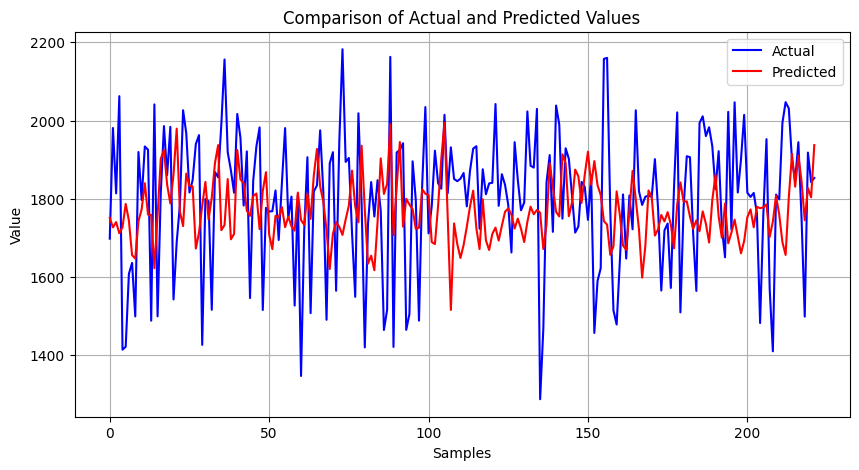

In [ ]:
import matplotlib.pyplot as plt

# Plotting the real vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(real_y, label='Actual', color='blue')
plt.plot(y_pred_inverse, label='Predicted', color='red')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd

# Create a DataFrame with the actual and predicted values
results_df = pd.DataFrame({
    'Actual': real_y.flatten(),  # Flattening if necessary
    'Predicted': y_pred_inverse.flatten()
})


# Write the DataFrame to an Excel file
with pd.ExcelWriter('CNN_Results_DS1.xlsx') as writer:
    results_df.to_excel(writer, sheet_name='Predictions', index=False)

print("Data has been written to Excel successfully.")


Data has been written to Excel successfully.


# **AutoEncoder**

In [ ]:
from tensorflow.keras.layers import Input, GRU, Dense, RepeatVector, TimeDistributed, Bidirectional, Dropout
from tensorflow.keras.models import Model, Sequential

# Assuming X_train is shaped (samples, timesteps, features)
input_dim = X_train.shape[2]
timesteps = X_train.shape[1]
encoding_dim = 32  # Desired dimensionality of encoded representation

# Encoder
inputs = Input(shape=(timesteps, input_dim))
encoded = Bidirectional(GRU(100, return_sequences=True))(inputs)
encoded = Dropout(0.2)(encoded)
encoded = Bidirectional(GRU(50))(encoded)  # No return_sequences to compress time dimension
encoded = Dropout(0.2)(encoded)
encoder_output = Dense(encoding_dim, activation='relu')(encoded)  # Final encoder output

# Decoder
decoded = RepeatVector(timesteps)(encoder_output)
decoded = Bidirectional(GRU(50, return_sequences=True))(decoded)
decoded = Dropout(0.2)(decoded)
decoded = Bidirectional(GRU(100, return_sequences=True))(decoded)
decoded = Dropout(0.2)(decoded)
decoder_output = TimeDistributed(Dense(input_dim))(decoded)

autoencoder = Model(inputs, decoder_output)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32)

# Extract encoded features using the encoder part of the autoencoder
encoder_model = Model(inputs=autoencoder.input, outputs=autoencoder.layers[-6].output)

encoded_X_train = encoder_model.predict(X_train)
# BiGRU model setup
bigru_model = Sequential([
    Bidirectional(GRU(100, return_sequences=True), input_shape=(timesteps, encoding_dim)),
    Dropout(0.2),
    Bidirectional(GRU(100, return_sequences=True)),
    Dropout(0.2),
    Bidirectional(GRU(50, return_sequences=True)),
    Dropout(0.2),
    Bidirectional(GRU(50)),
    Dropout(0.2),
    Dense(1)
])

bigru_model.compile(optimizer='adam', loss='mean_squared_error')
bigru_model.summary()

# Train BiGRU model on the encoded features
bigru_model.fit(encoded_X_train, y_train, epochs=50, batch_size=32)



Epoch 1/50
30/30 [==============================] - 41s 271ms/step - loss: 0.1173
Epoch 2/50
30/30 [==============================] - 7s 220ms/step - loss: 0.0625
Epoch 3/50
30/30 [==============================] - 7s 240ms/step - loss: 0.0572
Epoch 4/50
30/30 [==============================] - 6s 209ms/step - loss: 0.0543
Epoch 5/50
30/30 [==============================] - 7s 231ms/step - loss: 0.0527
Epoch 6/50
30/30 [==============================] - 6s 200ms/step - loss: 0.0508
Epoch 7/50
30/30 [==============================] - 7s 229ms/step - loss: 0.0498
Epoch 8/50
30/30 [==============================] - 6s 203ms/step - loss: 0.0487
Epoch 9/50
30/30 [==============================] - 6s 214ms/step - loss: 0.0483
Epoch 10/50
30/30 [==============================] - 3s 114ms/step - loss: 0.0476
Epoch 11/50
30/30 [==============================] - 3s 113ms/step - loss: 0.0472
Epoch 12/50
30/30 [==============================] - 5s 183ms/step - loss: 0.0468
Epoch 13/50
30/30 [=====

7/7 [==============================] - 1s 96ms/step
RMSE: 173.6507
MAE: 135.0343
MAD: 135.0343
MAPE: 7.8220%
R-squared: 0.0203


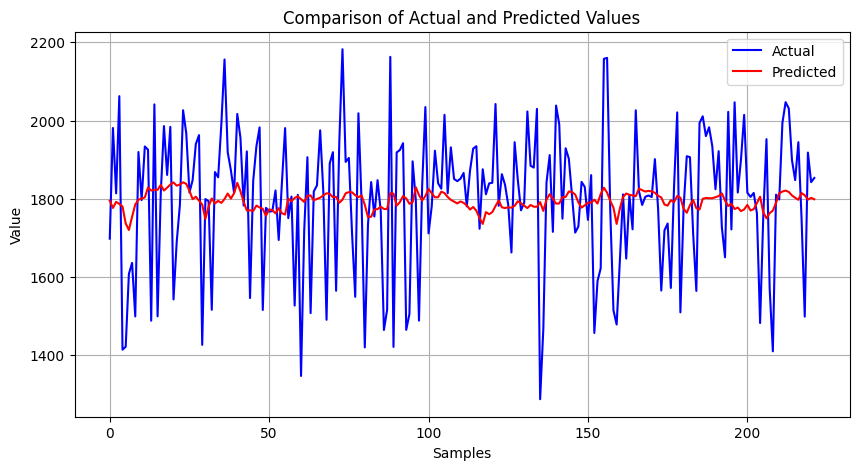

Results saved to Excel successfully.


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Assuming sc is an already fitted MinMaxScaler instance
test_features_scaled = sc.transform(test_df)

# Prepare sequences for testing
X_test = []
lag = 24  # Number of time steps to use as input
for i in range(lag, len(test_features_scaled)):
    X_test.append(test_features_scaled[i-lag:i])  # Use all features

X_test = np.array(X_test)

# Assuming autoencoder and bigru_model are already trained and encoder_model is defined as before
# Transform the test set using the encoder part of the autoencoder
encoded_X_test = encoder_model.predict(X_test)

# Make predictions using the BiGRU model on the encoded test set
y_pred = bigru_model.predict(encoded_X_test)
y_pred_reshaped = y_pred.reshape(-1, 1)

# Apply inverse transform to predictions
# Apply inverse transform to predictions
pred_full = np.zeros((y_pred_reshaped.shape[0], 31))  # Dummy array for inverse transform
pred_full[:, 0] = y_pred_reshaped.ravel()  # Assuming the target is the first column

y_pred_inverse_full = sc.inverse_transform(pred_full)  # Apply inverse transform
y_pred_inverse = y_pred_inverse_full[:, 0]  # Extract the target predictions

# Compare against actual values
real_y = test_df['Y'].values[-len(y_pred):]

# Calculate metrics
rmse = np.sqrt(mean_squared_error(real_y, y_pred_inverse))
mae = mean_absolute_error(real_y, y_pred_inverse)
mad = np.mean(np.abs(real_y - y_pred_inverse))
mape = np.mean(np.abs((real_y - y_pred_inverse) / real_y)) * 100
r2 = r2_score(real_y, y_pred_inverse)

# Print the results
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'MAD: {mad:.4f}')
print(f'MAPE: {mape:.4f}%')
print(f'R-squared: {r2:.4f}')

# Plotting the real vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(real_y, label='Actual', color='blue')
plt.plot(y_pred_inverse, label='Predicted', color='red')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Create a DataFrame with the actual and predicted values
results_df = pd.DataFrame({
    'Actual': real_y,  # No need to flatten if it's already a 1D array
    'Predicted': y_pred_inverse.flatten()  # Flattening to ensure it's a 1D array
})

# Write the DataFrame to an Excel file
results_df.to_excel('BiGRU_Autoencoder_Results_DS1.xlsx', index=False)
print("Results saved to Excel successfully.")
